In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict

In [2]:
df  = pd.read_csv("./WineQT.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [3]:
df = df.drop(columns=['Id'])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


=> scale data

In [6]:
df['quality'].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
total_sample = len(df)
train_data = df.sample(n=int(total_sample*0.8), random_state = 42)
df.drop(index=train_data.index, inplace=True)
validation_data = df.sample(n=int(total_sample*0.1), random_state = 42)
df.drop(index=validation_data.index, inplace=True)
test_data = df

In [9]:
train_data['quality']

158     5
1081    6
291     5
538     6
367     6
       ..
186     5
123     5
1052    7
608     6
143     7
Name: quality, Length: 914, dtype: int64

In [10]:
x_train, x_val, x_test = train_data.drop(columns=['quality']), validation_data.drop(columns=['quality']), test_data.drop(columns=['quality'])
y_train, y_val, y_test = train_data['quality'], validation_data['quality'], test_data['quality']

# Define Functions

In [11]:
def evaluation(model, feature, label, title, metric):
    prediction = model.predict(feature)
    print(title)
    print(metric(label, prediction))

In [12]:
def visualize_confusion_matrix(model, X, y, cmap, title, ax):
    y_pred = model.predict(X)
    sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt="d", cmap=cmap, xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"], ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_title(title)

In [13]:
def visualize_auc_roc_curve(model, X_test, y_test, model_name, ax):
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)

    ax.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = {:.4f})'.format(roc_auc))
    ax.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'Receiver Operating Characteristic (ROC) for {model_name}')
    ax.legend(loc='lower right')

In [14]:
def visualize_metrics_into_barchart(accuracy, test_precision, test_recall, test_f1score, auc_roc_score, model_name, ax):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
    values = [accuracy, test_precision, test_recall, test_f1score, auc_roc_score]

    bar_width = 0.35
    index = np.arange(len(metrics))

    bars = ax.bar(index, values, bar_width, label='Metrics', color=['#A62527', '#F28D51', '#8EC2DC', '#313695', '#B300A6'])
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Performance Score')
    ax.set_title(f"{model_name}'s performance on the test set")
    ax.set_xticks(index)
    ax.set_xticklabels(metrics)

    for i, value in enumerate(values):
        ax.text(i, value, f'{value:.4f}', ha='center', va='bottom')

In [15]:
def roc_auc_score(model, X, y):
    y_score = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)
    return roc_auc

In [16]:

def train_classifier(model, model_name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    evaluation(model, X_train, y_train, f'Classification report of {model_name} in training set', classification_report)
    print('='*55)
    evaluation(model, X_test, y_test, f'Classification report of {model_name} in test set', classification_report)

In [17]:

def overall_evaluation(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f'Accuracy: {round(accuracy_score(y_test, y_pred), 4)}')
    print(f'Precision: {round(precision_score(y_test, y_pred , average='weighted'), 4)}')
    print(f'Recall: {round(recall_score(y_test, y_pred, average='weighted'), 4)}')
    print(f'F1-score: {round(f1_score(y_test, y_pred, average='weighted'), 4)}')

In [18]:
def overall_evaluation_with_threshold(model, X_test, y_test, threshold):

    y_test_prob = model.predict_proba(X_test)[:, 1]
    y_test_pred = (y_test_prob > threshold).astype(int)

    print(f'Accuracy: {round(accuracy_score(y_test, y_test_pred), 4)}')
    print(f'Precision: {round(precision_score(y_test, y_test_pred), 4)}')
    print(f'Recall: {round(recall_score(y_test, y_test_pred), 4)}')
    print(f'F1-score: {round(f1_score(y_test, y_test_pred), 4)}')

In [19]:
def visualize_confusion_matrix_threshold(model, X, y, cmap, title, ax, threshold):
    
    y_prob = model.predict_proba(X)[:, 1]
    y_pred = (y_prob > threshold).astype(int)

    sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt="d", cmap=cmap, xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"], ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_title(title)

## Decision Tree Classifier

# I) No Augmentations

# No Scale

### 1.1) Default

In [20]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [21]:
y_train_pred = dt.predict(x_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        28
           5       1.00      1.00      1.00       389
           6       1.00      1.00      1.00       364
           7       1.00      1.00      1.00       114
           8       1.00      1.00      1.00        13

    accuracy                           1.00       914
   macro avg       1.00      1.00      1.00       914
weighted avg       1.00      1.00      1.00       914



In [22]:
overall_evaluation(dt, x_train, y_train)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [23]:
y_test_pred = dt.predict(x_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.50      0.25      0.33         4
           5       0.74      0.68      0.71        57
           6       0.55      0.51      0.53        43
           7       0.38      0.60      0.46        10
           8       0.00      0.00      0.00         1

    accuracy                           0.59       115
   macro avg       0.36      0.34      0.34       115
weighted avg       0.62      0.59      0.60       115



c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [24]:
overall_evaluation(dt, x_test, y_test)

Accuracy: 0.5913
Precision: 0.6204
Recall: 0.5913
F1-score: 0.6014


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 1.2) Cross Validation

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20, 30, 40, 50],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid,
    scoring='f1',
    cv=10, 
    n_jobs=-1
)

grid_search.fit(x_val, y_val)

best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Best hyperparameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(


In [27]:
dtc = DecisionTreeClassifier(class_weight= 'balanced', criterion= 'gini', max_depth= None, min_samples_leaf= 1, min_samples_split= 2, splitter= 'best')
train_classifier(dtc, 'DT', x_train, y_train, x_test, y_test)

Classification report of DT in training set
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        28
           5       1.00      1.00      1.00       389
           6       1.00      1.00      1.00       364
           7       1.00      1.00      1.00       114
           8       1.00      1.00      1.00        13

    accuracy                           1.00       914
   macro avg       1.00      1.00      1.00       914
weighted avg       1.00      1.00      1.00       914

Classification report of DT in test set
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.25      0.25      0.25         4
           5       0.70      0.67      0.68        57
           6       0.55      0.56      0.55        43
           7       0.58      0.70      0.64        10
           8       0.00      0.00      0.00     

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [28]:
overall_evaluation(dtc, x_test, y_test)

Accuracy: 0.6087
Precision: 0.6122
Recall: 0.6087
F1-score: 0.6097


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
from sklearn.model_selection import KFold
import numpy as np

In [30]:
n_splits = 10
skf = KFold(n_splits=n_splits, shuffle=True, random_state=42)


# Initialize a logistic regression model
dtc_2 = DecisionTreeClassifier(class_weight='balanced')

x_train_arr = np.array(x_train.values)

# Variables to store overall performance metrics
total_accuracy_train = 0
total_accuracy_test = 0

# Metrics history
fold_numbers = list(range(1, 11))
training_accuracy_history = []
test_accuracy_history = []
training_precision_history = []
test_precision_history = []
training_recall_history = []
test_recall_history = []
training_f1score_history = []
test_f1score_history = []
i = 0

# Perform KFold cross-validation
for train_index, test_index in skf.split(x_train_arr, y_train):
    x_train_f, x_test_f = x_train_arr[train_index], x_train_arr[test_index]
    y_train_f, y_test_f = y_train.iloc[train_index], y_train.iloc[test_index]  # Sử dụng iloc để lấy dữ liệu từ DataFrame

    # Train the model
    dtc_2.fit(x_train_f, y_train_f)

    # Make predictions
    y_train_pred = dtc_2.predict(x_train_f)
    y_test_pred = dtc_2.predict(x_test_f)

    # Log all values for model evaluation
    accuracy_train = accuracy_score(y_train_f, y_train_pred)
    accuracy_test = accuracy_score(y_test_f, y_test_pred)
    precision_train = precision_score(y_train_f, y_train_pred, average='weighted')
    precision_test = precision_score(y_test_f, y_test_pred, average='weighted')
    recall_train = recall_score(y_train_f, y_train_pred, average='weighted')
    recall_test = recall_score(y_test_f, y_test_pred, average='weighted')
    f1_train = f1_score(y_train_f, y_train_pred, average='weighted')
    f1_test = f1_score(y_test_f, y_test_pred, average='weighted')

    # Append values to the history lists
    training_accuracy_history.append(accuracy_train)
    test_accuracy_history.append(accuracy_test)
    training_precision_history.append(precision_train)
    test_precision_history.append(precision_test)
    training_recall_history.append(recall_train)
    test_recall_history.append(recall_test)
    training_f1score_history.append(f1_train)
    test_f1score_history.append(f1_test)

    # Evaluate the model
    accuracy_train = accuracy_score(y_train_f, y_train_pred)
    accuracy_test = accuracy_score(y_test_f, y_test_pred)
    total_accuracy_train += accuracy_train
    total_accuracy_test += accuracy_test

    # Print classification report and confusion matrix for each fold
    print(f'\nFold {i + 1}:')
    print(f'Accuracy (Train): {accuracy_train}')
    print('Classification Report (Train):')
    print(classification_report(y_train_f, y_train_pred))

    print('Confusion Matrix (Train):')
    print(confusion_matrix(y_train_f, y_train_pred))

    print(f'Accuracy (Test): {accuracy_test}')
    print('Classification Report (Test):')
    print(classification_report(y_test_f, y_test_pred))

    print('Confusion Matrix (Test):')
    print(confusion_matrix(y_test_f, y_test_pred))
    print(overall_evaluation(dtc_2, x_train_f, y_train_f))
    print(overall_evaluation(dtc_2, x_test_f, y_test_f))
    i+=1

# Calculate the average accuracy over all folds
average_accuracy_train = total_accuracy_train / n_splits
average_accuracy_test = total_accuracy_test / n_splits

print(f'Average Training Accuracy: {average_accuracy_train}')
print(f'Average Testing Accuracy: {average_accuracy_test}')

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita


Fold 1:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00       365
           6       1.00      1.00      1.00       312
           7       1.00      1.00      1.00       104
           8       1.00      1.00      1.00        12

    accuracy                           1.00       822
   macro avg       1.00      1.00      1.00       822
weighted avg       1.00      1.00      1.00       822

Confusion Matrix (Train):
[[  6   0   0   0   0   0]
 [  0  23   0   0   0   0]
 [  0   0 365   0   0   0]
 [  0   0   0 312   0   0]
 [  0   0   0   0 104   0]
 [  0   0   0   0   0  12]]
Accuracy (Test): 0.4782608695652174
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.20      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metri

Precision: 0.6103
Recall: 0.6154
F1-score: 0.6111
None

Fold 8:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00       338
           6       1.00      1.00      1.00       336
           7       1.00      1.00      1.00       106
           8       1.00      1.00      1.00        12

    accuracy                           1.00       823
   macro avg       1.00      1.00      1.00       823
weighted avg       1.00      1.00      1.00       823

Confusion Matrix (Train):
[[  6   0   0   0   0   0]
 [  0  25   0   0   0   0]
 [  0   0 338   0   0   0]
 [  0   0   0 336   0   0]
 [  0   0   0   0 106   0]
 [  0   0   0   0   0  12]]
Accuracy (Test): 0.6263736263736264
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [31]:
print(overall_evaluation(dtc_2, x_test, y_test))

Accuracy: 0.6174
Precision: 0.627
Recall: 0.6174
F1-score: 0.6171
None


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Scale data

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
train_val = pd.concat([x_train, x_val])

In [34]:
train_val

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
158,6.8,0.61,0.04,1.5,0.057,5.0,10.0,0.99525,3.42,0.60,9.500000
1081,6.9,0.84,0.21,4.1,0.074,16.0,65.0,0.99842,3.53,0.72,9.233333
291,7.0,0.58,0.12,1.9,0.091,34.0,124.0,0.99560,3.44,0.48,10.500000
538,7.8,0.48,0.68,1.7,0.415,14.0,32.0,0.99656,3.09,1.06,9.100000
367,12.5,0.60,0.49,4.3,0.100,5.0,14.0,1.00100,3.25,0.74,11.900000
...,...,...,...,...,...,...,...,...,...,...,...
826,7.6,0.50,0.29,2.3,0.086,5.0,14.0,0.99502,3.32,0.62,11.500000
791,7.1,0.39,0.12,2.1,0.065,14.0,24.0,0.99252,3.30,0.53,13.300000
524,7.7,0.56,0.20,2.0,0.075,9.0,39.0,0.99870,3.48,0.62,9.300000
216,7.5,0.53,0.06,2.6,0.086,20.0,44.0,0.99650,3.38,0.59,10.700000


In [35]:
sd = StandardScaler()
train_val_scale = pd.DataFrame(sd.fit_transform(train_val), columns=x_train.columns)

In [36]:
train_val_scale

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.859234,0.457731,-1.155349,-0.806074,-0.630220,-1.024851,-1.075796,-0.749193,0.689911,-0.333872,-0.883521
1,-0.802218,1.748902,-0.294147,1.253653,-0.270294,0.049350,0.594844,0.892586,1.390856,0.358803,-1.128694
2,-0.745202,0.289317,-0.750077,-0.489193,0.089631,1.807133,2.386985,-0.567924,0.817356,-1.026546,0.035879
3,-0.289074,-0.272061,2.086823,-0.647633,6.949393,-0.145959,-0.407540,-0.070729,-1.412923,2.321380,-1.251281
4,2.390681,0.401593,1.124303,1.412094,0.280180,-1.024851,-0.954295,2.228797,-0.393367,0.474248,1.323038
...,...,...,...,...,...,...,...,...,...,...,...
1023,-0.403106,-0.159785,0.111124,-0.172312,-0.016229,-1.024851,-0.954295,-0.868312,0.052689,-0.218426,0.955278
1024,-0.688186,-0.777302,-0.750077,-0.330752,-0.460843,-0.145959,-0.650542,-2.163091,-0.074756,-0.737932,2.610198
1025,-0.346090,0.177042,-0.344806,-0.409973,-0.249122,-0.634233,-0.194913,1.037601,1.072245,-0.218426,-1.067401
1026,-0.460122,0.008628,-1.054031,0.065349,-0.016229,0.439968,-0.043037,-0.101804,0.435022,-0.391595,0.219759


In [37]:
train_scale = train_val_scale.head(len(x_train))
val_scale = train_val_scale.drop(index=train_scale.index)

### 1.1) Default

In [38]:
dt = DecisionTreeClassifier()
dt.fit(train_scale, y_train)

DecisionTreeClassifier()

In [39]:
y_train_pred = dt.predict(train_scale)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        28
           5       1.00      1.00      1.00       389
           6       1.00      1.00      1.00       364
           7       1.00      1.00      1.00       114
           8       1.00      1.00      1.00        13

    accuracy                           1.00       914
   macro avg       1.00      1.00      1.00       914
weighted avg       1.00      1.00      1.00       914



In [40]:
overall_evaluation(dt, train_scale, y_train)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [41]:
y_val_pred = dt.predict(val_scale)
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         1
           5       0.60      0.68      0.63        37
           6       0.62      0.56      0.59        55
           7       0.41      0.47      0.44        19
           8       0.00      0.00      0.00         2

    accuracy                           0.57       114
   macro avg       0.32      0.34      0.33       114
weighted avg       0.56      0.57      0.56       114



c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [42]:
overall_evaluation(dt, sd.transform(x_test), y_test)

Accuracy: 0.5913
Precision: 0.6284
Recall: 0.5913
F1-score: 0.6072


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 1.2) Cross validation

In [43]:
# from sklearn.model_selection import GridSearchCV

In [44]:
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'splitter': ['best', 'random'],
#     'max_depth': [None, 10, 20, 30, 40, 50],
#     'min_samples_split': [2, 5, 10, 20, 30, 40, 50],
#     'min_samples_leaf': [1, 2, 4, 6, 8, 10],
#     'class_weight': [None, 'balanced']
# }

# grid_search = GridSearchCV(
#     DecisionTreeClassifier(),
#     param_grid,
#     scoring='f1',
#     cv=10, 
#     n_jobs=-1
# )

# grid_search.fit(val_scale, y_val)

# best_params = grid_search.best_params_
# print("Best hyperparameters:", best_params)

In [45]:
# dtc2 = DecisionTreeClassifier(class_weight= None, criterion= 'gini', max_depth= None, min_samples_leaf= 1, min_samples_split= 2, splitter= 'best')
# train_classifier(dtc2, 'DT', train_scale, y_train, sd.transform(x_test), y_test)

In [46]:
# overall_evaluation(dtc2, sd.transform(x_test), y_test)

In [47]:
n_splits = 10
skf = KFold(n_splits=n_splits, shuffle=True, random_state=42)


# Initialize a logistic regression model
dtc_3 = DecisionTreeClassifier(class_weight='balanced')

x_train_arr = np.array(x_train.values)

# Variables to store overall performance metrics
total_accuracy_train = 0
total_accuracy_test = 0

# Metrics history
fold_numbers = list(range(1, 11))
training_accuracy_history = []
test_accuracy_history = []
training_precision_history = []
test_precision_history = []
training_recall_history = []
test_recall_history = []
training_f1score_history = []
test_f1score_history = []
i = 0

# Perform KFold cross-validation
for train_index, test_index in skf.split(x_train_arr, y_train):
    x_train_f, x_test_f = x_train_arr[train_index], x_train_arr[test_index]
    y_train_f, y_test_f = y_train.iloc[train_index], y_train.iloc[test_index]  # Sử dụng iloc để lấy dữ liệu từ DataFrame

    # Train the model
    dtc_3.fit(x_train_f, y_train_f)

    # Make predictions
    y_train_pred = dtc_3.predict(x_train_f)
    y_test_pred = dtc_3.predict(x_test_f)

    # Log all values for model evaluation
    accuracy_train = accuracy_score(y_train_f, y_train_pred)
    accuracy_test = accuracy_score(y_test_f, y_test_pred)
    precision_train = precision_score(y_train_f, y_train_pred, average='weighted')
    precision_test = precision_score(y_test_f, y_test_pred, average='weighted')
    recall_train = recall_score(y_train_f, y_train_pred, average='weighted')
    recall_test = recall_score(y_test_f, y_test_pred, average='weighted')
    f1_train = f1_score(y_train_f, y_train_pred, average='weighted')
    f1_test = f1_score(y_test_f, y_test_pred, average='weighted')

    # Append values to the history lists
    training_accuracy_history.append(accuracy_train)
    test_accuracy_history.append(accuracy_test)
    training_precision_history.append(precision_train)
    test_precision_history.append(precision_test)
    training_recall_history.append(recall_train)
    test_recall_history.append(recall_test)
    training_f1score_history.append(f1_train)
    test_f1score_history.append(f1_test)

    # Evaluate the model
    accuracy_train = accuracy_score(y_train_f, y_train_pred)
    accuracy_test = accuracy_score(y_test_f, y_test_pred)
    total_accuracy_train += accuracy_train
    total_accuracy_test += accuracy_test

    # Print classification report and confusion matrix for each fold
    print(f'\nFold {i + 1}:')
    print(f'Accuracy (Train): {accuracy_train}')
    print('Classification Report (Train):')
    print(classification_report(y_train_f, y_train_pred))

    print('Confusion Matrix (Train):')
    print(confusion_matrix(y_train_f, y_train_pred))

    print(f'Accuracy (Test): {accuracy_test}')
    print('Classification Report (Test):')
    print(classification_report(y_test_f, y_test_pred))

    print('Confusion Matrix (Test):')
    print(confusion_matrix(y_test_f, y_test_pred))
    print(overall_evaluation(dtc_2, x_train_f, y_train_f))
    print(overall_evaluation(dtc_2, x_test_f, y_test_f))
    i+=1

# Calculate the average accuracy over all folds
average_accuracy_train = total_accuracy_train / n_splits
average_accuracy_test = total_accuracy_test / n_splits

print(f'Average Training Accuracy: {average_accuracy_train}')
print(f'Average Testing Accuracy: {average_accuracy_test}')

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita


Fold 1:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00       365
           6       1.00      1.00      1.00       312
           7       1.00      1.00      1.00       104
           8       1.00      1.00      1.00        12

    accuracy                           1.00       822
   macro avg       1.00      1.00      1.00       822
weighted avg       1.00      1.00      1.00       822

Confusion Matrix (Train):
[[  6   0   0   0   0   0]
 [  0  23   0   0   0   0]
 [  0   0 365   0   0   0]
 [  0   0   0 312   0   0]
 [  0   0   0   0 104   0]
 [  0   0   0   0   0  12]]
Accuracy (Test): 0.4673913043478261
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.20      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

[[ 0  1  4  0  0]
 [ 2 27  9  1  0]
 [ 2 11 19  3  1]
 [ 1  1  4  4  0]
 [ 0  0  0  1  0]]
Accuracy: 0.949
Precision: 0.9496
Recall: 0.949
F1-score: 0.9491
None
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
None


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Fold 7:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00       357
           6       1.00      1.00      1.00       327
           7       1.00      1.00      1.00        96
           8       1.00      1.00      1.00        11

    accuracy                           1.00       823
   macro avg       1.00      1.00      1.00       823
weighted avg       1.00      1.00      1.00       823

Confusion Matrix (Train):
[[  5   0   0   0   0   0]
 [  0  27   0   0   0   0]
 [  0   0 357   0   0   0]
 [  0   0   0 327   0   0]
 [  0   0   0   0  96   0]
 [  0   0   0   0   0  11]]
Accuracy (Test): 0.5824175824175825
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [48]:
print(overall_evaluation(dtc_3, x_test, y_test))

Accuracy: 0.6087
Precision: 0.6316
Recall: 0.6087
F1-score: 0.6144
None


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# II) Augmentation

# No Scale

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df_new= pd.read_csv("./wineQualityReds.csv")
df_new=df_new.drop(['Unnamed: 0'], axis=1)
df_new.rename(columns = {'fixed.acidity':'fixed acidity', 'volatile.acidity':'volatile acidity', 'citric.acid':'citric acid', 'residual.sugar':'residual sugar', 'free.sulfur.dioxide':'free sulfur dioxide', 'total.sulfur.dioxide':'total sulfur dioxide'}, inplace = True)
df_new.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 1.1 Default

In [51]:
df_combine_no_scale = pd.concat([df,df_new])
df_combine_no_scale.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
13,7.9,0.320,0.51,1.8,0.341,17.0,56.0,0.9969,3.04,1.08,9.2,6
20,7.1,0.710,0.00,1.9,0.080,14.0,35.0,0.9972,3.47,0.55,9.4,5
21,7.8,0.645,0.00,2.0,0.082,8.0,16.0,0.9964,3.38,0.59,9.8,6
34,8.8,0.660,0.26,1.7,0.074,4.0,23.0,0.9971,3.15,0.74,9.2,5
35,6.6,0.520,0.04,2.2,0.069,8.0,15.0,0.9956,3.40,0.63,9.4,6


In [52]:
total_sample = len(df_combine_no_scale)
train_data = df_combine_no_scale.sample(n=int(total_sample*0.8), random_state = 42)
df_combine_no_scale.drop(index=train_data.index, inplace=True)
validation_data = df_combine_no_scale.sample(n=int(total_sample*0.1), random_state = 42)


In [53]:
x_aug_train, x_aug_val = train_data.drop(columns=['quality']), validation_data.drop(columns=['quality'])
y_aug_train, y_aug_val = train_data['quality'], validation_data['quality']

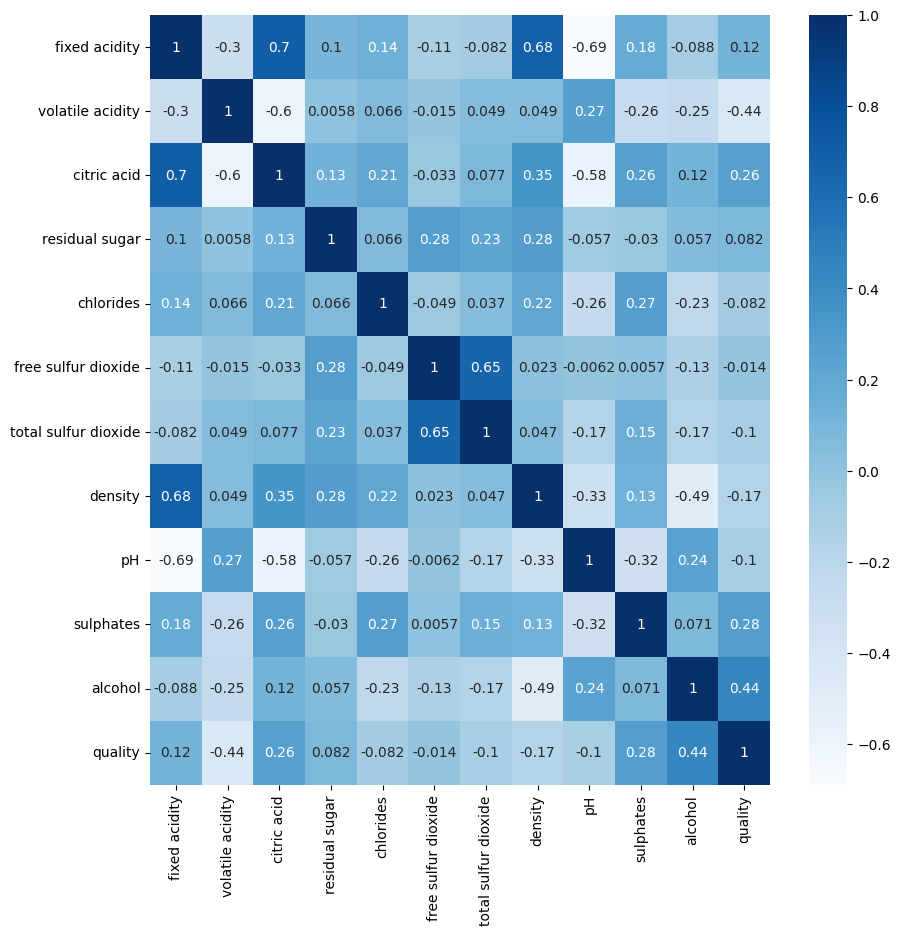

In [54]:
plt.figure(figsize=(10,10))
corr = df_combine_no_scale.corr()
sns.heatmap(corr,annot=True,cmap='Blues')
plt.show()

In [55]:
dt = DecisionTreeClassifier()
dt.fit(x_aug_train, y_aug_train)

DecisionTreeClassifier()

In [56]:
y_aug_pred = dt.predict(x_test)
print(classification_report(y_test, y_aug_pred))

              precision    recall  f1-score   support

           4       1.00      1.00      1.00         4
           5       0.98      1.00      0.99        57
           6       1.00      1.00      1.00        43
           7       1.00      0.90      0.95        10
           8       1.00      1.00      1.00         1

    accuracy                           0.99       115
   macro avg       1.00      0.98      0.99       115
weighted avg       0.99      0.99      0.99       115



In [57]:
overall_evaluation(dt, x_test, y_test)

Accuracy: 0.9913
Precision: 0.9915
Recall: 0.9913
F1-score: 0.9911


## 1.2 Cross-validation

In [58]:
# from sklearn.model_selection import GridSearchCV

In [59]:
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'splitter': ['best', 'random'],
#     'max_depth': [None, 10, 20, 30, 40, 50],
#     'min_samples_split': [2, 5, 10, 20, 30, 40, 50],
#     'min_samples_leaf': [1, 2, 4, 6, 8, 10],
#     'class_weight': [None, 'balanced']
# }

# grid_search = GridSearchCV(
#     DecisionTreeClassifier(),
#     param_grid,
#     scoring='f1',
#     cv=10, 
#     n_jobs=-1
# )

# grid_search.fit(val_scale, y_val)

# best_params = grid_search.best_params_
# print("Best hyperparameters:", best_params)

In [60]:
# dtc3 = DecisionTreeClassifier(class_weight= None, criterion= 'gini', max_depth= None, min_samples_leaf= 1, min_samples_split= 2, splitter= 'best')
# train_classifier(dtc3, 'DT', train_scale, y_train, pd.DataFrame(sd.transform(x_test), columns=x_train.columns).drop(columns=columns_to_drop), y_test)

In [61]:
# overall_evaluation(dtc3, pd.DataFrame(sd.transform(x_test), columns=x_train.columns).drop(columns=columns_to_drop), y_test)

In [62]:
n_splits = 10
skf = KFold(n_splits=n_splits, shuffle=True, random_state=42)


# Initialize a logistic regression model
dtc_4 = DecisionTreeClassifier(class_weight='balanced')

x_train_arr = np.array(x_aug_train.values)

# Variables to store overall performance metrics
total_accuracy_train = 0
total_accuracy_test = 0

# Metrics history
fold_numbers = list(range(1, 11))
training_accuracy_history = []
test_accuracy_history = []
training_precision_history = []
test_precision_history = []
training_recall_history = []
test_recall_history = []
training_f1score_history = []
test_f1score_history = []
i = 0

# Perform KFold cross-validation
for train_index, test_index in skf.split(x_train_arr, y_aug_train):
    x_train_f, x_test_f = x_train_arr[train_index], x_train_arr[test_index]
    y_train_f, y_test_f = y_aug_train.iloc[train_index], y_aug_train.iloc[test_index]  # Sử dụng iloc để lấy dữ liệu từ DataFrame

    # Train the model
    dtc_4.fit(x_train_f, y_train_f)

    # Make predictions
    y_train_pred = dtc_4.predict(x_train_f)
    y_test_pred = dtc_4.predict(x_test_f)

    # Log all values for model evaluation
    accuracy_train = accuracy_score(y_train_f, y_train_pred)
    accuracy_test = accuracy_score(y_test_f, y_test_pred)
    precision_train = precision_score(y_train_f, y_train_pred, average='weighted')
    precision_test = precision_score(y_test_f, y_test_pred, average='weighted')
    recall_train = recall_score(y_train_f, y_train_pred, average='weighted')
    recall_test = recall_score(y_test_f, y_test_pred, average='weighted')
    f1_train = f1_score(y_train_f, y_train_pred, average='weighted')
    f1_test = f1_score(y_test_f, y_test_pred, average='weighted')

    # Append values to the history lists
    training_accuracy_history.append(accuracy_train)
    test_accuracy_history.append(accuracy_test)
    training_precision_history.append(precision_train)
    test_precision_history.append(precision_test)
    training_recall_history.append(recall_train)
    test_recall_history.append(recall_test)
    training_f1score_history.append(f1_train)
    test_f1score_history.append(f1_test)

    # Evaluate the model
    accuracy_train = accuracy_score(y_train_f, y_train_pred)
    accuracy_test = accuracy_score(y_test_f, y_test_pred)
    total_accuracy_train += accuracy_train
    total_accuracy_test += accuracy_test

    # Print classification report and confusion matrix for each fold
    print(f'\nFold {i + 1}:')
    print(f'Accuracy (Train): {accuracy_train}')
    print('Classification Report (Train):')
    print(classification_report(y_train_f, y_train_pred))

    print('Confusion Matrix (Train):')
    print(confusion_matrix(y_train_f, y_train_pred))

    print(f'Accuracy (Test): {accuracy_test}')
    print('Classification Report (Test):')
    print(classification_report(y_test_f, y_test_pred))

    print('Confusion Matrix (Test):')
    print(confusion_matrix(y_test_f, y_test_pred))
    i+=1

# Calculate the average accuracy over all folds
average_accuracy_train = total_accuracy_train / n_splits
average_accuracy_test = total_accuracy_test / n_splits

print(f'Average Training Accuracy: {average_accuracy_train}')
print(f'Average Testing Accuracy: {average_accuracy_test}')


Fold 1:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00       537
           6       1.00      1.00      1.00       488
           7       1.00      1.00      1.00       144
           8       1.00      1.00      1.00        19

    accuracy                           1.00      1233
   macro avg       1.00      1.00      1.00      1233
weighted avg       1.00      1.00      1.00      1233

Confusion Matrix (Train):
[[  5   0   0   0   0   0]
 [  0  40   0   0   0   0]
 [  0   0 537   0   0   0]
 [  0   0   0 488   0   0]
 [  0   0   0   0 144   0]
 [  0   0   0   0   0  19]]
Accuracy (Test): 0.6159420289855072
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.29      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 


Confusion Matrix (Test):
[[ 0  0  1  0  0  0]
 [ 0  1  1  2  0  0]
 [ 2  3 41 14  1  0]
 [ 1  2 11 35  5  1]
 [ 0  0  2  4  5  1]
 [ 0  0  0  2  0  2]]

Fold 3:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00       539
           6       1.00      1.00      1.00       484
           7       1.00      1.00      1.00       146
           8       1.00      1.00      1.00        18

    accuracy                           1.00      1234
   macro avg       1.00      1.00      1.00      1234
weighted avg       1.00      1.00      1.00      1234

Confusion Matrix (Train):
[[  5   0   0   0   0   0]
 [  0  42   0   0   0   0]
 [  0   0 539   0   0   0]
 [  0   0   0 484   0   0]
 [  0   0   0   0 146   0]
 [  0   0   0   0   0  18]]
Accuracy (Test): 0.708029197080292
Classification Rep

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.82      0.71      0.76        72
           6       0.65      0.72      0.69        47
           7       0.65      0.73      0.69        15
           8       0.00      0.00      0.00         0

    accuracy                           0.70       137
   macro avg       0.35      0.36      0.36       137
weighted avg       0.73      0.70      0.71       137

Confusion Matrix (Test):
[[ 0  1  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  2 51 17  2  0]
 [ 0  1  8 34  4  0]
 [ 0  0  1  1 11  2]
 [ 0  0  0  0  0  0]]

Fold 6:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        43
           5       1.00      1.00      1.00       546
           6       1.00   

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         7
           5       0.64      0.61      0.62        57
           6       0.51      0.54      0.52        56
           7       0.47      0.50      0.48        16
           8       0.50      1.00      0.67         1

    accuracy                           0.54       137
   macro avg       0.35      0.44      0.38       137
weighted avg       0.53      0.54      0.53       137

Confusion Matrix (Test):
[[ 0  0  0  0  0  0]
 [ 1  0  2  3  1  0]
 [ 0  2 35 20  0  0]
 [ 0  1 16 30  8  1]
 [ 0  0  2  6  8  0]
 [ 0  0  0  0  0  1]]

Fold 9:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        39
           5       1.00      1.00      1.00       553
           6       1.00   

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [63]:
print(overall_evaluation(dtc_4, x_test, y_test))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
None


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


# Scale Data

In [64]:
sd2 = StandardScaler()

In [65]:
train_val_aug = pd.concat([x_aug_train, x_aug_val])

In [66]:
train_val_aug

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1481,8.2,0.280,0.60,3.0,0.104,10.0,22.0,0.99828,3.39,0.68,10.6
1145,8.2,0.200,0.43,2.5,0.076,31.0,51.0,0.99672,3.53,0.81,10.4
371,7.9,0.240,0.40,1.6,0.056,11.0,25.0,0.99670,3.32,0.87,8.7
1022,7.0,0.510,0.09,2.1,0.062,4.0,9.0,0.99584,3.35,0.54,10.5
252,11.1,0.350,0.48,3.1,0.090,5.0,21.0,0.99860,3.17,0.53,10.5
...,...,...,...,...,...,...,...,...,...,...,...
512,10.7,0.400,0.48,2.1,0.125,15.0,49.0,0.99800,3.03,0.81,9.7
1275,8.0,0.715,0.22,2.3,0.075,13.0,81.0,0.99688,3.24,0.54,9.5
905,9.2,0.580,0.20,3.0,0.081,15.0,115.0,0.99800,3.23,0.59,9.5
46,7.7,0.935,0.43,2.2,0.114,22.0,114.0,0.99700,3.25,0.73,9.2


In [67]:
sd2 = StandardScaler()
train_val_aug_scale = pd.DataFrame(sd2.fit_transform(train_val_aug), columns=x_train.columns)

In [68]:
train_val_aug_scale

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.071825,-1.405463,1.684830,0.308598,0.349365,-0.569865,-0.757927,0.791717,0.511270,0.139949,0.192176
1,-0.071825,-1.852423,0.814184,-0.034190,-0.241685,1.453643,0.127643,-0.036953,1.416336,0.923146,0.003737
2,-0.244159,-1.628943,0.660541,-0.651208,-0.663864,-0.473508,-0.666316,-0.047577,0.058736,1.284622,-1.597987
3,-0.761161,-0.120454,-0.927108,-0.308420,-0.537210,-1.148011,-1.154906,-0.504408,0.252679,-0.703495,0.097956
4,1.594073,-1.014373,1.070256,0.377155,0.053840,-1.051653,-0.788464,0.961701,-0.910978,-0.763741,0.097956
...,...,...,...,...,...,...,...,...,...,...,...
1537,1.364294,-0.735023,1.070256,-0.308420,0.792653,-0.088078,0.066569,0.642982,-1.816044,0.923146,-0.655796
1538,-0.186714,1.024880,-0.261320,-0.171305,-0.262794,-0.280793,1.043750,0.048039,-0.458445,-0.703495,-0.844234
1539,0.502623,0.270636,-0.363749,0.308598,-0.136140,-0.088078,2.082004,0.642982,-0.523092,-0.402265,-0.844234
1540,-0.359048,2.254020,0.814184,-0.239863,0.560455,0.586425,2.051467,0.111783,-0.393797,0.441179,-1.126892


In [69]:
train_scale_aug = train_val_aug_scale.head(len(x_aug_train))
val_scale_aug = train_val_aug_scale.drop(index=train_scale_aug.index)

## 1.1) Default

In [70]:
dt_5 = DecisionTreeClassifier()
dt_5.fit(train_scale_aug, y_aug_train)

DecisionTreeClassifier()

In [71]:
y_aug_scale_pred = dt.predict(train_scale_aug)
print(classification_report(y_aug_train, y_aug_scale_pred))

              precision    recall  f1-score   support

           3       0.03      0.33      0.06         6
           4       0.08      0.51      0.13        45
           5       0.43      0.02      0.05       601
           6       0.43      0.78      0.55       537
           7       0.00      0.00      0.00       163
           8       0.00      0.00      0.00        19

    accuracy                           0.33      1371
   macro avg       0.16      0.27      0.13      1371
weighted avg       0.36      0.33      0.24      1371



c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [72]:
overall_evaluation(dt_5, train_scale_aug,  y_aug_train)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [73]:
y_val_aug_pred = dt_5.predict(val_scale_aug)
print(classification_report(y_aug_val, y_val_aug_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.33      0.14      0.20         7
           5       0.73      0.72      0.72        75
           6       0.59      0.69      0.63        64
           7       0.56      0.43      0.49        23
           8       0.00      0.00      0.00         0

    accuracy                           0.64       171
   macro avg       0.37      0.33      0.34       171
weighted avg       0.63      0.64      0.63       171



c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [74]:
overall_evaluation(dt_5, sd2.transform(x_test), y_test)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## 1.2) Cross-validation

In [75]:
n_splits = 10
skf = KFold(n_splits=n_splits, shuffle=True, random_state=42)


# Initialize a logistic regression model
dtc_6 = DecisionTreeClassifier(class_weight='balanced')

x_train_arr = np.array(train_scale_aug.values)

# Variables to store overall performance metrics
total_accuracy_train = 0
total_accuracy_test = 0

# Metrics history
fold_numbers = list(range(1, 11))
training_accuracy_history = []
test_accuracy_history = []
training_precision_history = []
test_precision_history = []
training_recall_history = []
test_recall_history = []
training_f1score_history = []
test_f1score_history = []
i = 0

# Perform KFold cross-validation
for train_index, test_index in skf.split(x_train_arr, y_aug_train):
    x_train_f, x_test_f = x_train_arr[train_index], x_train_arr[test_index]
    y_train_f, y_test_f = y_aug_train.iloc[train_index], y_aug_train.iloc[test_index]  # Sử dụng iloc để lấy dữ liệu từ DataFrame

    # Train the model
    dtc_6.fit(x_train_f, y_train_f)

    # Make predictions
    y_train_pred = dtc_6.predict(x_train_f)
    y_test_pred = dtc_6.predict(x_test_f)

    # Log all values for model evaluation
    accuracy_train = accuracy_score(y_train_f, y_train_pred)
    accuracy_test = accuracy_score(y_test_f, y_test_pred)
    precision_train = precision_score(y_train_f, y_train_pred, average='weighted')
    precision_test = precision_score(y_test_f, y_test_pred, average='weighted')
    recall_train = recall_score(y_train_f, y_train_pred, average='weighted')
    recall_test = recall_score(y_test_f, y_test_pred, average='weighted')
    f1_train = f1_score(y_train_f, y_train_pred, average='weighted')
    f1_test = f1_score(y_test_f, y_test_pred, average='weighted')

    # Append values to the history lists
    training_accuracy_history.append(accuracy_train)
    test_accuracy_history.append(accuracy_test)
    training_precision_history.append(precision_train)
    test_precision_history.append(precision_test)
    training_recall_history.append(recall_train)
    test_recall_history.append(recall_test)
    training_f1score_history.append(f1_train)
    test_f1score_history.append(f1_test)

    # Evaluate the model
    accuracy_train = accuracy_score(y_train_f, y_train_pred)
    accuracy_test = accuracy_score(y_test_f, y_test_pred)
    total_accuracy_train += accuracy_train
    total_accuracy_test += accuracy_test

    # Print classification report and confusion matrix for each fold
    print(f'\nFold {i + 1}:')
    print(f'Accuracy (Train): {accuracy_train}')
    print('Classification Report (Train):')
    print(classification_report(y_train_f, y_train_pred))

    print('Confusion Matrix (Train):')
    print(confusion_matrix(y_train_f, y_train_pred))

    print(f'Accuracy (Test): {accuracy_test}')
    print('Classification Report (Test):')
    print(classification_report(y_test_f, y_test_pred))

    print('Confusion Matrix (Test):')
    print(confusion_matrix(y_test_f, y_test_pred))
    i+=1

# Calculate the average accuracy over all folds
average_accuracy_train = total_accuracy_train / n_splits
average_accuracy_test = total_accuracy_test / n_splits

print(f'Average Training Accuracy: {average_accuracy_train}')
print(f'Average Testing Accuracy: {average_accuracy_test}')

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 


Fold 1:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00       537
           6       1.00      1.00      1.00       488
           7       1.00      1.00      1.00       144
           8       1.00      1.00      1.00        19

    accuracy                           1.00      1233
   macro avg       1.00      1.00      1.00      1233
weighted avg       1.00      1.00      1.00      1233

Confusion Matrix (Train):
[[  5   0   0   0   0   0]
 [  0  40   0   0   0   0]
 [  0   0 537   0   0   0]
 [  0   0   0 488   0   0]
 [  0   0   0   0 144   0]
 [  0   0   0   0   0  19]]
Accuracy (Test): 0.644927536231884
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.40      0.4

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Fold 4:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00       542
           6       1.00      1.00      1.00       485
           7       1.00      1.00      1.00       148
           8       1.00      1.00      1.00        17

    accuracy                           1.00      1234
   macro avg       1.00      1.00      1.00      1234
weighted avg       1.00      1.00      1.00      1234

Confusion Matrix (Train):
[[  6   0   0   0   0   0]
 [  0  36   0   0   0   0]
 [  0   0 542   0   0   0]
 [  0   0   0 485   0   0]
 [  0   0   0   0 148   0]
 [  0   0   0   0   0  17]]
Accuracy (Test): 0.6423357664233577
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.14      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metri


Fold 7:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00       546
           6       1.00      1.00      1.00       480
           7       1.00      1.00      1.00       148
           8       1.00      1.00      1.00        14

    accuracy                           1.00      1234
   macro avg       1.00      1.00      1.00      1234
weighted avg       1.00      1.00      1.00      1234

Confusion Matrix (Train):
[[  6   0   0   0   0   0]
 [  0  40   0   0   0   0]
 [  0   0 546   0   0   0]
 [  0   0   0 480   0   0]
 [  0   0   0   0 148   0]
 [  0   0   0   0   0  14]]
Accuracy (Test): 0.5474452554744526
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita


Fold 9:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        39
           5       1.00      1.00      1.00       553
           6       1.00      1.00      1.00       476
           7       1.00      1.00      1.00       144
           8       1.00      1.00      1.00        17

    accuracy                           1.00      1234
   macro avg       1.00      1.00      1.00      1234
weighted avg       1.00      1.00      1.00      1234

Confusion Matrix (Train):
[[  5   0   0   0   0   0]
 [  0  39   0   0   0   0]
 [  0   0 553   0   0   0]
 [  0   0   0 476   0   0]
 [  0   0   0   0 144   0]
 [  0   0   0   0   0  17]]
Accuracy (Test): 0.6423357664233577
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.50      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Fold 10:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        43
           5       1.00      1.00      1.00       533
           6       1.00      1.00      1.00       488
           7       1.00      1.00      1.00       148
           8       1.00      1.00      1.00        17

    accuracy                           1.00      1234
   macro avg       1.00      1.00      1.00      1234
weighted avg       1.00      1.00      1.00      1234

Confusion Matrix (Train):
[[  5   0   0   0   0   0]
 [  0  43   0   0   0   0]
 [  0   0 533   0   0   0]
 [  0   0   0 488   0   0]
 [  0   0   0   0 148   0]
 [  0   0   0   0   0  17]]
Accuracy (Test): 0.7226277372262774
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.25      0

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [76]:
print(overall_evaluation(dtc_6,  sd2.transform(x_test), y_test))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
None


# SVM

## I) No Augmentations

# No Scale

## 1.1) Default

In [77]:
svc = SVC(probability=True)
train_classifier(svc, 'SVM', x_train, y_train, x_test, y_test)

Classification report of SVM in training set
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        28
           5       0.67      0.39      0.49       389
           6       0.45      0.85      0.59       364
           7       1.00      0.02      0.03       114
           8       0.00      0.00      0.00        13

    accuracy                           0.51       914
   macro avg       0.35      0.21      0.19       914
weighted avg       0.59      0.51      0.45       914

Classification report of SVM in test set
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         4
           5       0.74      0.49      0.59        57
           6       0.44      0.79      0.57        43
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00         1

    accuracy                           0.54  

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [78]:
overall_evaluation(svc, x_test, y_test)

Accuracy: 0.5391
Precision: 0.5303
Recall: 0.5391
F1-score: 0.5041


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 1.2) Cross-validations

In [79]:
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
#     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
#     'gamma': ['scale', 'auto', 0.1, 1, 10, 100],
#     'class_weight': [None, 'balanced'],
#     'probability': [False, True]
# }

# grid_search = GridSearchCV(
#     SVC(),
#     param_grid,
#     scoring='f1',
#     cv=15, 
#     n_jobs=-1
# )

# grid_search.fit(x_val, y_val)

# best_params = grid_search.best_params_
# print("Best hyperparameters:", best_params)

In [80]:
# svc2 = SVC(C=10, class_weight=None, gamma=0.1, kernel='rbf', probability=False)

In [81]:
n_splits = 10
skf = KFold(n_splits=n_splits, shuffle=True, random_state=42)


# Initialize a logistic regression model
svc_2 = SVC(class_weight='balanced', probability=True)

x_train_arr = np.array(x_train.values)

# Variables to store overall performance metrics
total_accuracy_train = 0
total_accuracy_test = 0

# Metrics history
fold_numbers = list(range(1, 11))
training_accuracy_history = []
test_accuracy_history = []
training_precision_history = []
test_precision_history = []
training_recall_history = []
test_recall_history = []
training_f1score_history = []
test_f1score_history = []
i = 0

# Perform KFold cross-validation
for train_index, test_index in skf.split(x_train_arr, y_train):
    x_train_f, x_test_f = x_train_arr[train_index], x_train_arr[test_index]
    y_train_f, y_test_f = y_train.iloc[train_index], y_train.iloc[test_index]  # Sử dụng iloc để lấy dữ liệu từ DataFrame

    # Train the model
    svc_2.fit(x_train_f, y_train_f)

    # Make predictions
    y_train_pred = svc_2.predict(x_train_f)
    y_test_pred = svc_2.predict(x_test_f)

    # Log all values for model evaluation
    accuracy_train = accuracy_score(y_train_f, y_train_pred)
    accuracy_test = accuracy_score(y_test_f, y_test_pred)
    precision_train = precision_score(y_train_f, y_train_pred, average='weighted')
    precision_test = precision_score(y_test_f, y_test_pred, average='weighted')
    recall_train = recall_score(y_train_f, y_train_pred, average='weighted')
    recall_test = recall_score(y_test_f, y_test_pred, average='weighted')
    f1_train = f1_score(y_train_f, y_train_pred, average='weighted')
    f1_test = f1_score(y_test_f, y_test_pred, average='weighted')

    # Append values to the history lists
    training_accuracy_history.append(accuracy_train)
    test_accuracy_history.append(accuracy_test)
    training_precision_history.append(precision_train)
    test_precision_history.append(precision_test)
    training_recall_history.append(recall_train)
    test_recall_history.append(recall_test)
    training_f1score_history.append(f1_train)
    test_f1score_history.append(f1_test)

    # Evaluate the model
    accuracy_train = accuracy_score(y_train_f, y_train_pred)
    accuracy_test = accuracy_score(y_test_f, y_test_pred)
    total_accuracy_train += accuracy_train
    total_accuracy_test += accuracy_test

    # Print classification report and confusion matrix for each fold
    print(f'\nFold {i + 1}:')
    print(f'Accuracy (Train): {accuracy_train}')
    print('Classification Report (Train):')
    print(classification_report(y_train_f, y_train_pred))

    print('Confusion Matrix (Train):')
    print(confusion_matrix(y_train_f, y_train_pred))

    print(f'Accuracy (Test): {accuracy_test}')
    print('Classification Report (Test):')
    print(classification_report(y_test_f, y_test_pred))

    print('Confusion Matrix (Test):')
    print(confusion_matrix(y_test_f, y_test_pred))
    i+=1

# Calculate the average accuracy over all folds
average_accuracy_train = total_accuracy_train / n_splits
average_accuracy_test = total_accuracy_test / n_splits

print(f'Average Training Accuracy: {average_accuracy_train}')
print(f'Average Testing Accuracy: {average_accuracy_test}')

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita


Fold 1:
Accuracy (Train): 0.3223844282238443
Classification Report (Train):
              precision    recall  f1-score   support

           3       0.06      0.67      0.10         6
           4       0.04      0.09      0.05        23
           5       0.74      0.31      0.44       365
           6       0.48      0.41      0.44       312
           7       0.21      0.10      0.13       104
           8       0.03      0.67      0.07        12

    accuracy                           0.32       822
   macro avg       0.26      0.37      0.21       822
weighted avg       0.54      0.32      0.38       822

Confusion Matrix (Train):
[[  4   0   0   2   0   0]
 [  5   2   5   6   2   3]
 [ 37  27 113 103  11  74]
 [ 19  18  26 128  22  99]
 [  6   3   8  29  10  48]
 [  1   0   1   0   2   8]]
Accuracy (Test): 0.20652173913043478
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4   

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita


Fold 2:
Accuracy (Train): 0.2798053527980535
Classification Report (Train):
              precision    recall  f1-score   support

           3       0.03      0.67      0.06         6
           4       0.07      0.08      0.07        26
           5       0.68      0.31      0.43       345
           6       0.48      0.31      0.38       331
           7       0.35      0.06      0.10       104
           8       0.03      0.80      0.06        10

    accuracy                           0.28       822
   macro avg       0.27      0.37      0.18       822
weighted avg       0.53      0.28      0.35       822

Confusion Matrix (Train):
[[  4   0   0   2   0   0]
 [  9   2   5   6   0   4]
 [ 52  14 108  78   2  91]
 [ 52  11  39 102   9 118]
 [ 15   3   7  23   6  50]
 [  1   0   0   1   0   8]]
Accuracy (Test): 0.25
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita


Fold 3:
Accuracy (Train): 0.28345498783454987
Classification Report (Train):
              precision    recall  f1-score   support

           3       0.02      0.67      0.04         6
           4       0.05      0.07      0.06        27
           5       0.72      0.29      0.41       352
           6       0.50      0.32      0.39       324
           7       0.16      0.18      0.17       101
           8       0.03      0.25      0.05        12

    accuracy                           0.28       822
   macro avg       0.25      0.30      0.19       822
weighted avg       0.53      0.28      0.35       822

Confusion Matrix (Train):
[[  4   0   0   2   0   0]
 [  9   2   5   7   2   2]
 [ 86  26 102  75  37  26]
 [ 85  15  26 104  51  43]
 [ 23   1   8  20  18  31]
 [  5   0   1   1   2   3]]
Accuracy (Test): 0.1956521739130435
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4   

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita


Fold 4:
Accuracy (Train): 0.22506082725060828
Classification Report (Train):
              precision    recall  f1-score   support

           3       0.01      1.00      0.03         3
           4       0.05      0.19      0.08        26
           5       0.73      0.24      0.36       351
           6       0.46      0.23      0.31       329
           7       0.15      0.12      0.13       100
           8       0.02      0.23      0.04        13

    accuracy                           0.23       822
   macro avg       0.24      0.34      0.16       822
weighted avg       0.52      0.23      0.30       822

Confusion Matrix (Train):
[[ 3  0  0  0  0  0]
 [ 8  5  2  7  2  2]
 [87 53 85 61 27 38]
 [90 44 22 77 39 57]
 [23  1  7 20 12 37]
 [ 6  0  1  1  2  3]]
Accuracy (Test): 0.2391304347826087
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.09      0.67      0.16         3
           4       0.00      0.00      0.00        

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita


Fold 5:
Accuracy (Train): 0.2818955042527339
Classification Report (Train):
              precision    recall  f1-score   support

           3       0.02      0.67      0.04         6
           4       0.04      0.08      0.06        25
           5       0.71      0.32      0.44       340
           6       0.49      0.31      0.38       334
           7       0.18      0.12      0.15       106
           8       0.02      0.25      0.04        12

    accuracy                           0.28       823
   macro avg       0.25      0.29      0.18       823
weighted avg       0.52      0.28      0.36       823

Confusion Matrix (Train):
[[  4   0   0   2   0   0]
 [  8   2   6   5   1   3]
 [ 87  24 108  72  17  32]
 [ 92  18  30 102  38  54]
 [ 24   3   7  25  13  34]
 [  5   0   1   1   2   3]]
Accuracy (Test): 0.2857142857142857
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4    

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita


Fold 6:
Accuracy (Train): 0.23572296476306198
Classification Report (Train):
              precision    recall  f1-score   support

           3       0.02      0.67      0.04         6
           4       0.04      0.26      0.08        23
           5       0.76      0.19      0.31       350
           6       0.49      0.34      0.40       328
           7       0.13      0.04      0.06       104
           8       0.02      0.25      0.04        12

    accuracy                           0.24       823
   macro avg       0.24      0.29      0.15       823
weighted avg       0.54      0.24      0.30       823

Confusion Matrix (Train):
[[  4   0   0   2   0   0]
 [  6   6   1   7   0   3]
 [ 83  71  67  75  10  44]
 [ 84  51  14 110  16  53]
 [ 26   5   6  29   4  34]
 [  6   1   0   2   0   3]]
Accuracy (Test): 0.2087912087912088
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4   

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita


Fold 8:
Accuracy (Train): 0.25759416767922233
Classification Report (Train):
              precision    recall  f1-score   support

           3       0.02      0.67      0.03         6
           4       0.06      0.24      0.10        25
           5       0.69      0.20      0.30       338
           6       0.48      0.35      0.40       336
           7       0.17      0.15      0.16       106
           8       0.04      0.17      0.06        12

    accuracy                           0.26       823
   macro avg       0.24      0.30      0.18       823
weighted avg       0.50      0.26      0.31       823

Confusion Matrix (Train):
[[  4   0   0   2   0   0]
 [  8   6   1   8   2   0]
 [ 90  59  66  90  31   2]
 [ 98  33  20 118  44  23]
 [ 27   2   9  28  16  24]
 [  6   1   0   1   2   2]]
Accuracy (Test): 0.32967032967032966
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4  

In [82]:
overall_evaluation(svc_2, x_test, y_test)

Accuracy: 0.287
Precision: 0.5026
Recall: 0.287
F1-score: 0.359


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Scale

In [83]:
train_scale

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.859234,0.457731,-1.155349,-0.806074,-0.630220,-1.024851,-1.075796,-0.749193,0.689911,-0.333872,-0.883521
1,-0.802218,1.748902,-0.294147,1.253653,-0.270294,0.049350,0.594844,0.892586,1.390856,0.358803,-1.128694
2,-0.745202,0.289317,-0.750077,-0.489193,0.089631,1.807133,2.386985,-0.567924,0.817356,-1.026546,0.035879
3,-0.289074,-0.272061,2.086823,-0.647633,6.949393,-0.145959,-0.407540,-0.070729,-1.412923,2.321380,-1.251281
4,2.390681,0.401593,1.124303,1.412094,0.280180,-1.024851,-0.954295,2.228797,-0.393367,0.474248,1.323038
...,...,...,...,...,...,...,...,...,...,...,...
909,-0.175041,-0.047510,-1.206008,-0.647633,-0.354983,-0.536578,-0.316414,-0.490237,0.180133,-0.507040,-0.423821
910,-0.802218,-0.159785,-1.155349,-0.806074,-0.037401,0.342314,0.108840,-0.464342,0.243855,0.705140,-0.883521
911,-1.714475,-0.328199,-0.800736,-0.251532,-0.820769,0.049350,1.323851,-2.525628,1.454578,1.282368,2.855371
912,0.566167,-0.945715,0.617714,-0.806074,-0.143262,2.490715,0.291091,-0.091446,1.008522,0.416525,0.403638


In [84]:
svc3 = SVC(probability=True)
svc3.fit(train_scale, y_train)

SVC(probability=True)

In [85]:
y_scale_pred = svc3.predict(sd.transform(x_test))
print(classification_report(y_test, y_scale_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         4
           5       0.71      0.77      0.74        57
           6       0.53      0.53      0.53        43
           7       0.30      0.30      0.30        10
           8       0.00      0.00      0.00         1

    accuracy                           0.61       115
   macro avg       0.31      0.32      0.31       115
weighted avg       0.58      0.61      0.59       115



c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classificat

In [86]:
overall_evaluation(svc3, sd.transform(x_test),  y_test)

Accuracy: 0.6087
Precision: 0.5778
Recall: 0.6087
F1-score: 0.5926


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 1.2) Cross-validation

In [87]:
n_splits = 10
skf = KFold(n_splits=n_splits, shuffle=True, random_state=42)


# Initialize a logistic regression model
svc_4 = SVC(class_weight='balanced', probability=True)

x_train_arr = np.array(train_scale.values)

# Variables to store overall performance metrics
total_accuracy_train = 0
total_accuracy_test = 0

# Metrics history
fold_numbers = list(range(1, 11))
training_accuracy_history = []
test_accuracy_history = []
training_precision_history = []
test_precision_history = []
training_recall_history = []
test_recall_history = []
training_f1score_history = []
test_f1score_history = []
i = 0

# Perform KFold cross-validation
for train_index, test_index in skf.split(x_train_arr, y_train):
    x_train_f, x_test_f = x_train_arr[train_index], x_train_arr[test_index]
    y_train_f, y_test_f = y_train.iloc[train_index], y_train.iloc[test_index]  # Sử dụng iloc để lấy dữ liệu từ DataFrame

    # Train the model
    svc_4.fit(x_train_f, y_train_f)

    # Make predictions
    y_train_pred = svc_4.predict(x_train_f)
    y_test_pred = svc_4.predict(x_test_f)

    # Log all values for model evaluation
    accuracy_train = accuracy_score(y_train_f, y_train_pred)
    accuracy_test = accuracy_score(y_test_f, y_test_pred)
    precision_train = precision_score(y_train_f, y_train_pred, average='weighted')
    precision_test = precision_score(y_test_f, y_test_pred, average='weighted')
    recall_train = recall_score(y_train_f, y_train_pred, average='weighted')
    recall_test = recall_score(y_test_f, y_test_pred, average='weighted')
    f1_train = f1_score(y_train_f, y_train_pred, average='weighted')
    f1_test = f1_score(y_test_f, y_test_pred, average='weighted')

    # Append values to the history lists
    training_accuracy_history.append(accuracy_train)
    test_accuracy_history.append(accuracy_test)
    training_precision_history.append(precision_train)
    test_precision_history.append(precision_test)
    training_recall_history.append(recall_train)
    test_recall_history.append(recall_test)
    training_f1score_history.append(f1_train)
    test_f1score_history.append(f1_test)

    # Evaluate the model
    accuracy_train = accuracy_score(y_train_f, y_train_pred)
    accuracy_test = accuracy_score(y_test_f, y_test_pred)
    total_accuracy_train += accuracy_train
    total_accuracy_test += accuracy_test

    # Print classification report and confusion matrix for each fold
    print(f'\nFold {i + 1}:')
    print(f'Accuracy (Train): {accuracy_train}')
    print('Classification Report (Train):')
    print(classification_report(y_train_f, y_train_pred))

    print('Confusion Matrix (Train):')
    print(confusion_matrix(y_train_f, y_train_pred))

    print(f'Accuracy (Test): {accuracy_test}')
    print('Classification Report (Test):')
    print(classification_report(y_test_f, y_test_pred))

    print('Confusion Matrix (Test):')
    print(confusion_matrix(y_test_f, y_test_pred))
    i+=1

# Calculate the average accuracy over all folds
average_accuracy_train = total_accuracy_train / n_splits
average_accuracy_test = total_accuracy_test / n_splits

print(f'Average Training Accuracy: {average_accuracy_train}')
print(f'Average Testing Accuracy: {average_accuracy_test}')

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita


Fold 1:
Accuracy (Train): 0.6155717761557178
Classification Report (Train):
              precision    recall  f1-score   support

           3       0.30      1.00      0.46         6
           4       0.22      0.74      0.34        23
           5       0.78      0.62      0.69       365
           6       0.67      0.54      0.60       312
           7       0.57      0.70      0.63       104
           8       0.23      1.00      0.38        12

    accuracy                           0.62       822
   macro avg       0.46      0.77      0.52       822
weighted avg       0.69      0.62      0.63       822

Confusion Matrix (Train):
[[  6   0   0   0   0   0]
 [  1  17   5   0   0   0]
 [  9  42 228  68  13   5]
 [  4  17  58 170  41  22]
 [  0   1   2  15  73  13]
 [  0   0   0   0   0  12]]
Accuracy (Test): 0.3804347826086957
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4    

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita


Fold 3:
Accuracy (Train): 0.6021897810218978
Classification Report (Train):
              precision    recall  f1-score   support

           3       0.33      1.00      0.50         6
           4       0.24      0.74      0.36        27
           5       0.75      0.65      0.69       352
           6       0.67      0.50      0.57       324
           7       0.56      0.67      0.61       101
           8       0.22      1.00      0.36        12

    accuracy                           0.60       822
   macro avg       0.46      0.76      0.52       822
weighted avg       0.67      0.60      0.62       822

Confusion Matrix (Train):
[[  6   0   0   0   0   0]
 [  1  20   6   0   0   0]
 [  6  43 228  62   8   5]
 [  5  19  69 161  45  25]
 [  0   1   2  18  68  12]
 [  0   0   0   0   0  12]]
Accuracy (Test): 0.532608695652174
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4     

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita


Fold 4:
Accuracy (Train): 0.6204379562043796
Classification Report (Train):
              precision    recall  f1-score   support

           3       0.38      1.00      0.55         3
           4       0.27      0.81      0.40        26
           5       0.75      0.66      0.71       351
           6       0.70      0.53      0.60       329
           7       0.55      0.66      0.60       100
           8       0.23      1.00      0.38        13

    accuracy                           0.62       822
   macro avg       0.48      0.78      0.54       822
weighted avg       0.68      0.62      0.64       822

Confusion Matrix (Train):
[[  3   0   0   0   0   0]
 [  0  21   5   0   0   0]
 [  3  38 233  61  12   4]
 [  2  18  69 174  43  23]
 [  0   2   2  14  66  16]
 [  0   0   0   0   0  13]]
Accuracy (Test): 0.4891304347826087
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4    

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita


Fold 5:
Accuracy (Train): 0.6172539489671932
Classification Report (Train):
              precision    recall  f1-score   support

           3       0.29      1.00      0.44         6
           4       0.27      0.76      0.40        25
           5       0.76      0.64      0.70       340
           6       0.68      0.53      0.60       334
           7       0.59      0.70      0.64       106
           8       0.23      1.00      0.37        12

    accuracy                           0.62       823
   macro avg       0.47      0.77      0.52       823
weighted avg       0.68      0.62      0.63       823

Confusion Matrix (Train):
[[  6   0   0   0   0   0]
 [  1  19   3   2   0   0]
 [  8  34 219  67   9   3]
 [  6  17  65 178  43  25]
 [  0   1   2  16  74  13]
 [  0   0   0   0   0  12]]
Accuracy (Test): 0.46153846153846156
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4   

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita


Fold 6:
Accuracy (Train): 0.6099635479951397
Classification Report (Train):
              precision    recall  f1-score   support

           3       0.30      1.00      0.46         6
           4       0.26      0.83      0.40        23
           5       0.75      0.63      0.69       350
           6       0.68      0.53      0.59       328
           7       0.58      0.68      0.63       104
           8       0.20      1.00      0.34        12

    accuracy                           0.61       823
   macro avg       0.46      0.78      0.52       823
weighted avg       0.68      0.61      0.63       823

Confusion Matrix (Train):
[[  6   0   0   0   0   0]
 [  1  19   2   1   0   0]
 [  8  39 221  67  10   5]
 [  5  13  69 173  41  27]
 [  0   2   2  14  71  15]
 [  0   0   0   0   0  12]]
Accuracy (Test): 0.5494505494505495
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4    

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita


Fold 8:
Accuracy (Train): 0.6038882138517618
Classification Report (Train):
              precision    recall  f1-score   support

           3       0.35      1.00      0.52         6
           4       0.24      0.72      0.36        25
           5       0.73      0.65      0.69       338
           6       0.70      0.52      0.59       336
           7       0.54      0.64      0.58       106
           8       0.21      1.00      0.35        12

    accuracy                           0.60       823
   macro avg       0.46      0.75      0.52       823
weighted avg       0.67      0.60      0.62       823

Confusion Matrix (Train):
[[  6   0   0   0   0   0]
 [  1  18   5   1   0   0]
 [  7  39 219  58  12   3]
 [  3  16  72 174  47  24]
 [  0   2   2  17  68  17]
 [  0   0   0   0   0  12]]
Accuracy (Test): 0.5934065934065934
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4    

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Fold 9:
Accuracy (Train): 0.6075334143377886
Classification Report (Train):
              precision    recall  f1-score   support

           3       0.45      1.00      0.62         5
           4       0.23      0.88      0.36        25
           5       0.75      0.64      0.69       348
           6       0.69      0.52      0.59       333
           7       0.56      0.66      0.61       101
           8       0.22      1.00      0.35        11

    accuracy                           0.61       823
   macro avg       0.48      0.78      0.54       823
weighted avg       0.68      0.61      0.63       823

Confusion Matrix (Train):
[[  5   0   0   0   0   0]
 [  0  22   3   0   0   0]
 [  3  50 222  59  11   3]
 [  3  22  70 173  41  24]
 [  0   3   1  17  67  13]
 [  0   0   0   0   0  11]]
Accuracy (Test): 0.4945054945054945
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4    

In [88]:
print(overall_evaluation(svc_4,  sd.transform(x_test), y_test))

Accuracy: 0.5391
Precision: 0.6317
Recall: 0.5391
F1-score: 0.5783
None


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# II) Augumentations

# No Scale

## 1.1) Default

In [89]:
svc_5 = SVC(probability=True)
train_classifier(svc_5, 'SVM', x_aug_train, y_aug_train, x_test, y_test)

Classification report of SVM in training set
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        45
           5       0.64      0.49      0.55       601
           6       0.45      0.76      0.56       537
           7       1.00      0.01      0.01       163
           8       0.00      0.00      0.00        19

    accuracy                           0.51      1371
   macro avg       0.35      0.21      0.19      1371
weighted avg       0.58      0.51      0.46      1371

Classification report of SVM in test set
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         4
           5       0.69      0.60      0.64        57
           6       0.47      0.72      0.57        43
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00         1

    accuracy                           0.57  

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [90]:
overall_evaluation(svc_5, x_test, y_test)

Accuracy: 0.5652
Precision: 0.5195
Recall: 0.5652
F1-score: 0.5307


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 1.2) Cross-validations

In [91]:
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
#     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
#     'gamma': ['scale', 'auto', 0.1, 1, 10, 100],
#     'class_weight': [None, 'balanced'],
#     'probability': [False, True]
# }

# grid_search = GridSearchCV(
#     SVC(),
#     param_grid,
#     scoring='f1',
#     cv=15, 
#     n_jobs=-1
# )

# grid_search.fit(x_val, y_val)

# best_params = grid_search.best_params_
# print("Best hyperparameters:", best_params)

In [92]:
# svc2 = SVC(C=10, class_weight=None, gamma=0.1, kernel='rbf', probability=False)

In [93]:
n_splits = 10
skf = KFold(n_splits=n_splits, shuffle=True, random_state=42)


# Initialize a logistic regression model
svc_6 = SVC(class_weight='balanced', probability=True)

x_train_arr = np.array(x_aug_train.values)

# Variables to store overall performance metrics
total_accuracy_train = 0
total_accuracy_test = 0

# Metrics history
fold_numbers = list(range(1, 11))
training_accuracy_history = []
test_accuracy_history = []
training_precision_history = []
test_precision_history = []
training_recall_history = []
test_recall_history = []
training_f1score_history = []
test_f1score_history = []
i = 0

# Perform KFold cross-validation
for train_index, test_index in skf.split(x_train_arr, y_aug_train):
    x_train_f, x_test_f = x_train_arr[train_index], x_train_arr[test_index]
    y_train_f, y_test_f = y_aug_train.iloc[train_index], y_aug_train.iloc[test_index]  # Sử dụng iloc để lấy dữ liệu từ DataFrame

    # Train the model
    svc_6.fit(x_train_f, y_train_f)

    # Make predictions
    y_train_pred = svc_6.predict(x_train_f)
    y_test_pred = svc_6.predict(x_test_f)

    # Log all values for model evaluation
    accuracy_train = accuracy_score(y_train_f, y_train_pred)
    accuracy_test = accuracy_score(y_test_f, y_test_pred)
    precision_train = precision_score(y_train_f, y_train_pred, average='weighted')
    precision_test = precision_score(y_test_f, y_test_pred, average='weighted')
    recall_train = recall_score(y_train_f, y_train_pred, average='weighted')
    recall_test = recall_score(y_test_f, y_test_pred, average='weighted')
    f1_train = f1_score(y_train_f, y_train_pred, average='weighted')
    f1_test = f1_score(y_test_f, y_test_pred, average='weighted')

    # Append values to the history lists
    training_accuracy_history.append(accuracy_train)
    test_accuracy_history.append(accuracy_test)
    training_precision_history.append(precision_train)
    test_precision_history.append(precision_test)
    training_recall_history.append(recall_train)
    test_recall_history.append(recall_test)
    training_f1score_history.append(f1_train)
    test_f1score_history.append(f1_test)

    # Evaluate the model
    accuracy_train = accuracy_score(y_train_f, y_train_pred)
    accuracy_test = accuracy_score(y_test_f, y_test_pred)
    total_accuracy_train += accuracy_train
    total_accuracy_test += accuracy_test

    # Print classification report and confusion matrix for each fold
    print(f'\nFold {i + 1}:')
    print(f'Accuracy (Train): {accuracy_train}')
    print('Classification Report (Train):')
    print(classification_report(y_train_f, y_train_pred))

    print('Confusion Matrix (Train):')
    print(confusion_matrix(y_train_f, y_train_pred))

    print(f'Accuracy (Test): {accuracy_test}')
    print('Classification Report (Test):')
    print(classification_report(y_test_f, y_test_pred))

    print('Confusion Matrix (Test):')
    print(confusion_matrix(y_test_f, y_test_pred))
    i+=1

# Calculate the average accuracy over all folds
average_accuracy_train = total_accuracy_train / n_splits
average_accuracy_test = total_accuracy_test / n_splits

print(f'Average Training Accuracy: {average_accuracy_train}')
print(f'Average Testing Accuracy: {average_accuracy_test}')

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita


Fold 1:
Accuracy (Train): 0.39902676399026765
Classification Report (Train):
              precision    recall  f1-score   support

           3       0.02      0.80      0.04         5
           4       0.00      0.00      0.00        40
           5       0.73      0.39      0.50       537
           6       0.49      0.46      0.47       488
           7       0.23      0.37      0.28       144
           8       0.11      0.16      0.13        19

    accuracy                           0.40      1233
   macro avg       0.26      0.36      0.24      1233
weighted avg       0.54      0.40      0.44      1233

Confusion Matrix (Train):
[[  4   0   0   1   0   0]
 [ 16   0   6  11   6   1]
 [ 79   6 207 176  59  10]
 [ 79   2  65 225 108   9]
 [ 37   0   6  43  53   5]
 [  5   0   1   4   6   3]]
Accuracy (Test): 0.35507246376811596
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4  

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 


Fold 4:
Accuracy (Train): 0.3719611021069692
Classification Report (Train):
              precision    recall  f1-score   support

           3       0.01      0.50      0.02         6
           4       0.00      0.00      0.00        36
           5       0.72      0.38      0.50       542
           6       0.46      0.42      0.44       485
           7       0.25      0.30      0.27       148
           8       0.09      0.18      0.12        17

    accuracy                           0.37      1234
   macro avg       0.25      0.30      0.22      1234
weighted avg       0.53      0.37      0.43      1234

Confusion Matrix (Train):
[[  3   0   0   3   0   0]
 [ 16   0   6   9   4   1]
 [113   3 205 175  33  13]
 [106   3  68 203  94  11]
 [ 45   1   6  44  45   7]
 [  5   0   1   3   5   3]]
Accuracy (Test): 0.3795620437956204
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4    

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 


Fold 5:
Accuracy (Train): 0.3727714748784441
Classification Report (Train):
              precision    recall  f1-score   support

           3       0.01      0.60      0.02         5
           4       0.00      0.00      0.00        43
           5       0.71      0.38      0.49       529
           6       0.49      0.45      0.47       490
           7       0.29      0.22      0.25       148
           8       0.10      0.21      0.14        19

    accuracy                           0.37      1234
   macro avg       0.27      0.31      0.23      1234
weighted avg       0.54      0.37      0.43      1234

Confusion Matrix (Train):
[[  3   0   0   2   0   0]
 [ 22   0   6  10   4   1]
 [127   0 199 168  22  13]
 [133   0  68 221  54  14]
 [ 58   0   6  43  33   8]
 [  9   0   1   3   2   4]]
Accuracy (Test): 0.40145985401459855
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4   

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita


Fold 6:
Accuracy (Train): 0.3719611021069692
Classification Report (Train):
              precision    recall  f1-score   support

           3       0.01      0.67      0.02         6
           4       0.00      0.00      0.00        43
           5       0.72      0.39      0.50       546
           6       0.47      0.43      0.45       479
           7       0.36      0.24      0.29       143
           8       0.11      0.29      0.16        17

    accuracy                           0.37      1234
   macro avg       0.28      0.34      0.24      1234
weighted avg       0.55      0.37      0.43      1234

Confusion Matrix (Train):
[[  4   0   0   2   0   0]
 [ 24   0   6  10   2   1]
 [132   3 211 172  14  14]
 [142   4  67 204  46  16]
 [ 52   1   7  39  35   9]
 [  7   0   1   3   1   5]]
Accuracy (Test): 0.43795620437956206
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4   

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 


Fold 7:
Accuracy (Train): 0.3695299837925446
Classification Report (Train):
              precision    recall  f1-score   support

           3       0.01      0.17      0.02         6
           4       0.05      0.03      0.03        40
           5       0.72      0.38      0.50       546
           6       0.47      0.45      0.46       480
           7       0.21      0.11      0.15       148
           8       0.04      0.79      0.07        14

    accuracy                           0.37      1234
   macro avg       0.25      0.32      0.21      1234
weighted avg       0.53      0.37      0.42      1234

Confusion Matrix (Train):
[[  1   0   0   3   0   2]
 [  8   1   5  11   4  11]
 [ 46   8 208 179  16  89]
 [ 26   9  70 218  42 115]
 [  6   3   7  51  17  64]
 [  0   0   0   2   1  11]]
Accuracy (Test): 0.31386861313868614
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4   

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita


Fold 8:
Accuracy (Train): 0.39627228525121555
Classification Report (Train):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.06      0.63      0.12        38
           5       0.75      0.39      0.51       544
           6       0.48      0.46      0.47       481
           7       0.40      0.22      0.29       147
           8       0.09      0.17      0.12        18

    accuracy                           0.40      1234
   macro avg       0.30      0.31      0.25      1234
weighted avg       0.57      0.40      0.45      1234

Confusion Matrix (Train):
[[  0   3   0   3   0   0]
 [  1  24   2  10   0   1]
 [  2 136 210 173  12  11]
 [  7 148  61 219  35  11]
 [  0  56   6  46  33   6]
 [  1   6   1   4   3   3]]
Accuracy (Test): 0.29927007299270075
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4  

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Fold 9:
Accuracy (Train): 0.33225283630470015
Classification Report (Train):
              precision    recall  f1-score   support

           3       0.01      0.80      0.02         5
           4       0.00      0.00      0.00        39
           5       0.73      0.40      0.51       553
           6       0.46      0.32      0.37       476
           7       0.41      0.23      0.29       144
           8       0.08      0.18      0.11        17

    accuracy                           0.33      1234
   macro avg       0.28      0.32      0.22      1234
weighted avg       0.55      0.33      0.41      1234

Confusion Matrix (Train):
[[  4   0   0   1   0   0]
 [ 23   0   6   8   1   1]
 [178   0 220 134   7  14]
 [206   0  71 150  37  12]
 [ 69   0   5  30  33   7]
 [  9   0   1   2   2   3]]
Accuracy (Test): 0.29927007299270075
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.01      1.00      0.03         1
           4  

In [94]:
overall_evaluation(svc_6, x_test, y_test)

Accuracy: 0.3739
Precision: 0.5719
Recall: 0.3739
F1-score: 0.4394


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Scale

In [95]:
train_scale_aug

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.071825,-1.405463,1.684830,0.308598,0.349365,-0.569865,-0.757927,0.791717,0.511270,0.139949,0.192176
1,-0.071825,-1.852423,0.814184,-0.034190,-0.241685,1.453643,0.127643,-0.036953,1.416336,0.923146,0.003737
2,-0.244159,-1.628943,0.660541,-0.651208,-0.663864,-0.473508,-0.666316,-0.047577,0.058736,1.284622,-1.597987
3,-0.761161,-0.120454,-0.927108,-0.308420,-0.537210,-1.148011,-1.154906,-0.504408,0.252679,-0.703495,0.097956
4,1.594073,-1.014373,1.070256,0.377155,0.053840,-1.051653,-0.788464,0.961701,-0.910978,-0.763741,0.097956
...,...,...,...,...,...,...,...,...,...,...,...
1366,-0.301603,0.103026,0.404468,-0.239863,-0.283903,0.490067,0.585696,0.324262,-0.393797,-0.583003,-1.126892
1367,1.651517,0.717596,-0.158891,-0.034190,-0.051705,0.008280,0.188717,1.333540,-1.622102,0.380933,0.569052
1368,0.847291,-1.293723,0.609326,-0.582650,-0.537210,-1.244368,-1.154906,-1.056855,-1.104921,-0.522757,1.040147
1369,-0.876051,0.326506,-1.080752,2.365324,-0.579428,-0.473508,-0.880074,-0.313177,0.640565,-0.402265,0.380614


In [96]:
svc7 = SVC(probability=True)
svc7.fit(train_scale_aug, y_aug_train)

SVC(probability=True)

In [97]:
y_scale_aug_pred = svc7.predict(sd2.transform(x_test))
print(classification_report(y_test, y_scale_aug_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         4
           5       0.76      0.93      0.83        57
           6       0.71      0.67      0.69        43
           7       0.50      0.20      0.29        10
           8       0.00      0.00      0.00         1

    accuracy                           0.73       115
   macro avg       0.39      0.36      0.36       115
weighted avg       0.68      0.73      0.70       115



c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classificat

In [98]:
overall_evaluation(svc7, sd.transform(x_test),  y_test)

Accuracy: 0.7304
Precision: 0.6924
Recall: 0.7304
F1-score: 0.6954


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 1.2) Cross-validation

In [99]:
n_splits = 10
skf = KFold(n_splits=n_splits, shuffle=True, random_state=42)


# Initialize a logistic regression model
svc_8 = SVC(class_weight='balanced', probability=True)

x_train_arr = np.array(train_scale_aug.values)

# Variables to store overall performance metrics
total_accuracy_train = 0
total_accuracy_test = 0

# Metrics history
fold_numbers = list(range(1, 11))
training_accuracy_history = []
test_accuracy_history = []
training_precision_history = []
test_precision_history = []
training_recall_history = []
test_recall_history = []
training_f1score_history = []
test_f1score_history = []
i = 0

# Perform KFold cross-validation
for train_index, test_index in skf.split(x_train_arr, y_aug_train):
    x_train_f, x_test_f = x_train_arr[train_index], x_train_arr[test_index]
    y_train_f, y_test_f = y_aug_train.iloc[train_index], y_aug_train.iloc[test_index]  # Sử dụng iloc để lấy dữ liệu từ DataFrame

    # Train the model
    svc_8.fit(x_train_f, y_train_f)

    # Make predictions
    y_train_pred = svc_8.predict(x_train_f)
    y_test_pred = svc_8.predict(x_test_f)

    # Log all values for model evaluation
    accuracy_train = accuracy_score(y_train_f, y_train_pred)
    accuracy_test = accuracy_score(y_test_f, y_test_pred)
    precision_train = precision_score(y_train_f, y_train_pred, average='weighted')
    precision_test = precision_score(y_test_f, y_test_pred, average='weighted')
    recall_train = recall_score(y_train_f, y_train_pred, average='weighted')
    recall_test = recall_score(y_test_f, y_test_pred, average='weighted')
    f1_train = f1_score(y_train_f, y_train_pred, average='weighted')
    f1_test = f1_score(y_test_f, y_test_pred, average='weighted')

    # Append values to the history lists
    training_accuracy_history.append(accuracy_train)
    test_accuracy_history.append(accuracy_test)
    training_precision_history.append(precision_train)
    test_precision_history.append(precision_test)
    training_recall_history.append(recall_train)
    test_recall_history.append(recall_test)
    training_f1score_history.append(f1_train)
    test_f1score_history.append(f1_test)

    # Evaluate the model
    accuracy_train = accuracy_score(y_train_f, y_train_pred)
    accuracy_test = accuracy_score(y_test_f, y_test_pred)
    total_accuracy_train += accuracy_train
    total_accuracy_test += accuracy_test

    # Print classification report and confusion matrix for each fold
    print(f'\nFold {i + 1}:')
    print(f'Accuracy (Train): {accuracy_train}')
    print('Classification Report (Train):')
    print(classification_report(y_train_f, y_train_pred))

    print('Confusion Matrix (Train):')
    print(confusion_matrix(y_train_f, y_train_pred))

    print(f'Accuracy (Test): {accuracy_test}')
    print('Classification Report (Test):')
    print(classification_report(y_test_f, y_test_pred))

    print('Confusion Matrix (Test):')
    print(confusion_matrix(y_test_f, y_test_pred))
    i+=1

# Calculate the average accuracy over all folds
average_accuracy_train = total_accuracy_train / n_splits
average_accuracy_test = total_accuracy_test / n_splits

print(f'Average Training Accuracy: {average_accuracy_train}')
print(f'Average Testing Accuracy: {average_accuracy_test}')

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita


Fold 1:
Accuracy (Train): 0.5758313057583131
Classification Report (Train):
              precision    recall  f1-score   support

           3       0.31      1.00      0.48         5
           4       0.25      0.85      0.38        40
           5       0.74      0.65      0.70       537
           6       0.67      0.44      0.53       488
           7       0.44      0.62      0.51       144
           8       0.21      1.00      0.35        19

    accuracy                           0.58      1233
   macro avg       0.44      0.76      0.49      1233
weighted avg       0.65      0.58      0.59      1233

Confusion Matrix (Train):
[[  5   0   0   0   0   0]
 [  2  34   3   1   0   0]
 [  8  70 350  82  22   5]
 [  1  28 112 213  93  41]
 [  0   5   5  20  89  25]
 [  0   0   0   0   0  19]]
Accuracy (Test): 0.5144927536231884
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4    

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita


Fold 4:
Accuracy (Train): 0.5713128038897893
Classification Report (Train):
              precision    recall  f1-score   support

           3       0.40      1.00      0.57         6
           4       0.21      0.81      0.34        36
           5       0.74      0.66      0.70       542
           6       0.66      0.41      0.51       485
           7       0.46      0.66      0.54       148
           8       0.20      1.00      0.33        17

    accuracy                           0.57      1234
   macro avg       0.44      0.75      0.50      1234
weighted avg       0.65      0.57      0.59      1234

Confusion Matrix (Train):
[[  6   0   0   0   0   0]
 [  3  29   4   0   0   0]
 [  4  72 357  83  21   5]
 [  2  34 119 199  94  37]
 [  0   1   3  20  97  27]
 [  0   0   0   0   0  17]]
Accuracy (Test): 0.5328467153284672
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4    

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita


Fold 5:
Accuracy (Train): 0.5729335494327391
Classification Report (Train):
              precision    recall  f1-score   support

           3       0.38      1.00      0.56         5
           4       0.25      0.84      0.39        43
           5       0.75      0.65      0.70       529
           6       0.69      0.41      0.51       490
           7       0.44      0.68      0.53       148
           8       0.20      1.00      0.33        19

    accuracy                           0.57      1234
   macro avg       0.45      0.76      0.50      1234
weighted avg       0.66      0.57      0.59      1234

Confusion Matrix (Train):
[[  5   0   0   0   0   0]
 [  1  36   5   1   0   0]
 [  6  74 346  74  24   5]
 [  1  29 110 201 102  47]
 [  0   4   3  15 100  26]
 [  0   0   0   0   0  19]]
Accuracy (Test): 0.5474452554744526
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4    

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita


Fold 6:
Accuracy (Train): 0.5696920583468396
Classification Report (Train):
              precision    recall  f1-score   support

           3       0.40      1.00      0.57         6
           4       0.24      0.86      0.38        43
           5       0.74      0.65      0.69       546
           6       0.66      0.39      0.49       479
           7       0.43      0.71      0.54       143
           8       0.24      0.94      0.38        17

    accuracy                           0.57      1234
   macro avg       0.45      0.76      0.51      1234
weighted avg       0.65      0.57      0.58      1234

Confusion Matrix (Train):
[[  6   0   0   0   0   0]
 [  1  37   4   1   0   0]
 [  7  77 354  82  22   4]
 [  1  35 118 189 109  27]
 [  0   4   4  13 101  21]
 [  0   0   0   0   1  16]]
Accuracy (Test): 0.5255474452554745
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4    

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita


Fold 7:
Accuracy (Train): 0.5615883306320908
Classification Report (Train):
              precision    recall  f1-score   support

           3       0.35      1.00      0.52         6
           4       0.21      0.85      0.34        40
           5       0.73      0.62      0.67       546
           6       0.67      0.42      0.51       480
           7       0.43      0.67      0.52       148
           8       0.23      1.00      0.37        14

    accuracy                           0.56      1234
   macro avg       0.44      0.76      0.49      1234
weighted avg       0.65      0.56      0.58      1234

Confusion Matrix (Train):
[[  6   0   0   0   0   0]
 [  2  34   3   1   0   0]
 [  8  93 339  78  24   4]
 [  1  28 118 201 107  25]
 [  0   5   5  21  99  18]
 [  0   0   0   0   0  14]]
Accuracy (Test): 0.4744525547445255
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4    

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita


Fold 8:
Accuracy (Train): 0.5899513776337115
Classification Report (Train):
              precision    recall  f1-score   support

           3       0.40      1.00      0.57         6
           4       0.22      0.87      0.35        38
           5       0.76      0.66      0.70       544
           6       0.67      0.43      0.53       481
           7       0.46      0.73      0.56       147
           8       0.29      0.89      0.44        18

    accuracy                           0.59      1234
   macro avg       0.47      0.76      0.53      1234
weighted avg       0.66      0.59      0.60      1234

Confusion Matrix (Train):
[[  6   0   0   0   0   0]
 [  2  33   1   2   0   0]
 [  6  75 357  79  24   3]
 [  1  37 109 209 102  23]
 [  0   4   2  21 107  13]
 [  0   0   0   0   2  16]]
Accuracy (Test): 0.48905109489051096
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4   

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [100]:
print(overall_evaluation(svc_8,  sd2.transform(x_test), y_test))

Accuracy: 0.6261
Precision: 0.7094
Recall: 0.6261
F1-score: 0.6383
None


# Random Forest

# I) No Augmentations

# No Scale

# 1.1) Defaults

In [101]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [102]:
y_pred = rf.predict(x_test)

In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         4
           5       0.78      0.79      0.78        57
           6       0.60      0.63      0.61        43
           7       0.42      0.50      0.45        10
           8       0.00      0.00      0.00         1

    accuracy                           0.67       115
   macro avg       0.36      0.38      0.37       115
weighted avg       0.65      0.67      0.66       115



c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [104]:
overall_evaluation(rf, x_test, y_test)

Accuracy: 0.6696
Precision: 0.6451
Recall: 0.6696
F1-score: 0.6569


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 1.2) Cross-validations

In [105]:
n_splits = 10
skf = KFold(n_splits=n_splits, shuffle=True, random_state=42)


# Initialize a logistic regression model
rf_2 = RandomForestClassifier(class_weight='balanced')

x_train_arr = np.array(x_train.values)

# Variables to store overall performance metrics
total_accuracy_train = 0
total_accuracy_test = 0

# Metrics history
fold_numbers = list(range(1, 11))
training_accuracy_history = []
test_accuracy_history = []
training_precision_history = []
test_precision_history = []
training_recall_history = []
test_recall_history = []
training_f1score_history = []
test_f1score_history = []
i = 0

# Perform KFold cross-validation
for train_index, test_index in skf.split(x_train_arr, y_train):
    x_train_f, x_test_f = x_train_arr[train_index], x_train_arr[test_index]
    y_train_f, y_test_f = y_train.iloc[train_index], y_train.iloc[test_index]  # Sử dụng iloc để lấy dữ liệu từ DataFrame

    # Train the model
    rf_2.fit(x_train_f, y_train_f)

    # Make predictions
    y_train_pred = rf_2.predict(x_train_f)
    y_test_pred = rf_2.predict(x_test_f)

    # Log all values for model evaluation
    accuracy_train = accuracy_score(y_train_f, y_train_pred)
    accuracy_test = accuracy_score(y_test_f, y_test_pred)
    precision_train = precision_score(y_train_f, y_train_pred, average='weighted')
    precision_test = precision_score(y_test_f, y_test_pred, average='weighted')
    recall_train = recall_score(y_train_f, y_train_pred, average='weighted')
    recall_test = recall_score(y_test_f, y_test_pred, average='weighted')
    f1_train = f1_score(y_train_f, y_train_pred, average='weighted')
    f1_test = f1_score(y_test_f, y_test_pred, average='weighted')

    # Append values to the history lists
    training_accuracy_history.append(accuracy_train)
    test_accuracy_history.append(accuracy_test)
    training_precision_history.append(precision_train)
    test_precision_history.append(precision_test)
    training_recall_history.append(recall_train)
    test_recall_history.append(recall_test)
    training_f1score_history.append(f1_train)
    test_f1score_history.append(f1_test)

    # Evaluate the model
    accuracy_train = accuracy_score(y_train_f, y_train_pred)
    accuracy_test = accuracy_score(y_test_f, y_test_pred)
    total_accuracy_train += accuracy_train
    total_accuracy_test += accuracy_test

    # Print classification report and confusion matrix for each fold
    print(f'\nFold {i + 1}:')
    print(f'Accuracy (Train): {accuracy_train}')
    print('Classification Report (Train):')
    print(classification_report(y_train_f, y_train_pred))

    print('Confusion Matrix (Train):')
    print(confusion_matrix(y_train_f, y_train_pred))

    print(f'Accuracy (Test): {accuracy_test}')
    print('Classification Report (Test):')
    print(classification_report(y_test_f, y_test_pred))

    print('Confusion Matrix (Test):')
    print(confusion_matrix(y_test_f, y_test_pred))
    i+=1

# Calculate the average accuracy over all folds
average_accuracy_train = total_accuracy_train / n_splits
average_accuracy_test = total_accuracy_test / n_splits

print(f'Average Training Accuracy: {average_accuracy_train}')
print(f'Average Testing Accuracy: {average_accuracy_test}')

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Fold 1:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00       365
           6       1.00      1.00      1.00       312
           7       1.00      1.00      1.00       104
           8       1.00      1.00      1.00        12

    accuracy                           1.00       822
   macro avg       1.00      1.00      1.00       822
weighted avg       1.00      1.00      1.00       822

Confusion Matrix (Train):
[[  6   0   0   0   0   0]
 [  0  23   0   0   0   0]
 [  0   0 365   0   0   0]
 [  0   0   0 312   0   0]
 [  0   0   0   0 104   0]
 [  0   0   0   0   0  12]]
Accuracy (Test): 0.5760869565217391
Classification Report (Test):
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         5
           5       0.45      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Fold 2:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00       345
           6       1.00      1.00      1.00       331
           7       1.00      1.00      1.00       104
           8       1.00      1.00      1.00        10

    accuracy                           1.00       822
   macro avg       1.00      1.00      1.00       822
weighted avg       1.00      1.00      1.00       822

Confusion Matrix (Train):
[[  6   0   0   0   0   0]
 [  0  26   0   0   0   0]
 [  0   0 345   0   0   0]
 [  0   0   0 331   0   0]
 [  0   0   0   0 104   0]
 [  0   0   0   0   0  10]]
Accuracy (Test): 0.6956521739130435
Classification Report (Test):
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         2
           5       0.82      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Fold 3:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00       352
           6       1.00      1.00      1.00       324
           7       1.00      1.00      1.00       101
           8       1.00      1.00      1.00        12

    accuracy                           1.00       822
   macro avg       1.00      1.00      1.00       822
weighted avg       1.00      1.00      1.00       822

Confusion Matrix (Train):
[[  6   0   0   0   0   0]
 [  0  27   0   0   0   0]
 [  0   0 352   0   0   0]
 [  0   0   0 324   0   0]
 [  0   0   0   0 101   0]
 [  0   0   0   0   0  12]]
Accuracy (Test): 0.7282608695652174
Classification Report (Test):
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         1
           5       0.70      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Fold 4:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00       351
           6       1.00      1.00      1.00       329
           7       1.00      1.00      1.00       100
           8       1.00      1.00      1.00        13

    accuracy                           1.00       822
   macro avg       1.00      1.00      1.00       822
weighted avg       1.00      1.00      1.00       822

Confusion Matrix (Train):
[[  3   0   0   0   0   0]
 [  0  26   0   0   0   0]
 [  0   0 351   0   0   0]
 [  0   0   0 329   0   0]
 [  0   0   0   0 100   0]
 [  0   0   0   0   0  13]]
Accuracy (Test): 0.6847826086956522
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 


Fold 5:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00       340
           6       1.00      1.00      1.00       334
           7       1.00      1.00      1.00       106
           8       1.00      1.00      1.00        12

    accuracy                           1.00       823
   macro avg       1.00      1.00      1.00       823
weighted avg       1.00      1.00      1.00       823

Confusion Matrix (Train):
[[  6   0   0   0   0   0]
 [  0  25   0   0   0   0]
 [  0   0 340   0   0   0]
 [  0   0   0 334   0   0]
 [  0   0   0   0 106   0]
 [  0   0   0   0   0  12]]
Accuracy (Test): 0.6923076923076923
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Fold 6:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00       350
           6       1.00      1.00      1.00       328
           7       1.00      1.00      1.00       104
           8       1.00      1.00      1.00        12

    accuracy                           1.00       823
   macro avg       1.00      1.00      1.00       823
weighted avg       1.00      1.00      1.00       823

Confusion Matrix (Train):
[[  6   0   0   0   0   0]
 [  0  23   0   0   0   0]
 [  0   0 350   0   0   0]
 [  0   0   0 328   0   0]
 [  0   0   0   0 104   0]
 [  0   0   0   0   0  12]]
Accuracy (Test): 0.6153846153846154
Classification Report (Test):
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         5
           5       0.63      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Fold 7:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00       357
           6       1.00      1.00      1.00       327
           7       1.00      1.00      1.00        96
           8       1.00      1.00      1.00        11

    accuracy                           1.00       823
   macro avg       1.00      1.00      1.00       823
weighted avg       1.00      1.00      1.00       823

Confusion Matrix (Train):
[[  5   0   0   0   0   0]
 [  0  27   0   0   0   0]
 [  0   0 357   0   0   0]
 [  0   0   0 327   0   0]
 [  0   0   0   0  96   0]
 [  0   0   0   0   0  11]]
Accuracy (Test): 0.6923076923076923
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Fold 8:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00       338
           6       1.00      1.00      1.00       336
           7       1.00      1.00      1.00       106
           8       1.00      1.00      1.00        12

    accuracy                           1.00       823
   macro avg       1.00      1.00      1.00       823
weighted avg       1.00      1.00      1.00       823

Confusion Matrix (Train):
[[  6   0   0   0   0   0]
 [  0  25   0   0   0   0]
 [  0   0 338   0   0   0]
 [  0   0   0 336   0   0]
 [  0   0   0   0 106   0]
 [  0   0   0   0   0  12]]
Accuracy (Test): 0.7032967032967034
Classification Report (Test):
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         3
           5       0.80      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Fold 9:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00       348
           6       1.00      1.00      1.00       333
           7       1.00      1.00      1.00       101
           8       1.00      1.00      1.00        11

    accuracy                           1.00       823
   macro avg       1.00      1.00      1.00       823
weighted avg       1.00      1.00      1.00       823

Confusion Matrix (Train):
[[  5   0   0   0   0   0]
 [  0  25   0   0   0   0]
 [  0   0 348   0   0   0]
 [  0   0   0 333   0   0]
 [  0   0   0   0 101   0]
 [  0   0   0   0   0  11]]
Accuracy (Test): 0.7032967032967034
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [106]:
overall_evaluation(rf_2, x_test, y_test)

Accuracy: 0.6087
Precision: 0.5938
Recall: 0.6087
F1-score: 0.5994


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Scale

In [107]:
train_scale

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.859234,0.457731,-1.155349,-0.806074,-0.630220,-1.024851,-1.075796,-0.749193,0.689911,-0.333872,-0.883521
1,-0.802218,1.748902,-0.294147,1.253653,-0.270294,0.049350,0.594844,0.892586,1.390856,0.358803,-1.128694
2,-0.745202,0.289317,-0.750077,-0.489193,0.089631,1.807133,2.386985,-0.567924,0.817356,-1.026546,0.035879
3,-0.289074,-0.272061,2.086823,-0.647633,6.949393,-0.145959,-0.407540,-0.070729,-1.412923,2.321380,-1.251281
4,2.390681,0.401593,1.124303,1.412094,0.280180,-1.024851,-0.954295,2.228797,-0.393367,0.474248,1.323038
...,...,...,...,...,...,...,...,...,...,...,...
909,-0.175041,-0.047510,-1.206008,-0.647633,-0.354983,-0.536578,-0.316414,-0.490237,0.180133,-0.507040,-0.423821
910,-0.802218,-0.159785,-1.155349,-0.806074,-0.037401,0.342314,0.108840,-0.464342,0.243855,0.705140,-0.883521
911,-1.714475,-0.328199,-0.800736,-0.251532,-0.820769,0.049350,1.323851,-2.525628,1.454578,1.282368,2.855371
912,0.566167,-0.945715,0.617714,-0.806074,-0.143262,2.490715,0.291091,-0.091446,1.008522,0.416525,0.403638


In [108]:
rf_3 = RandomForestClassifier()
rf_3.fit(train_scale, y_train)

RandomForestClassifier()

In [109]:
y_scale_pred = rf_3.predict(sd.transform(x_test))
print(classification_report(y_test, y_scale_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         4
           5       0.75      0.75      0.75        57
           6       0.60      0.63      0.61        43
           7       0.31      0.40      0.35        10
           8       0.00      0.00      0.00         1

    accuracy                           0.64       115
   macro avg       0.33      0.36      0.34       115
weighted avg       0.63      0.64      0.63       115



c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\m

In [110]:
overall_evaluation(rf_3, sd.transform(x_test),  y_test)

Accuracy: 0.6435
Precision: 0.625
Recall: 0.6435
F1-score: 0.6336


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 1.2) Cross-validation

In [111]:
n_splits = 10
skf = KFold(n_splits=n_splits, shuffle=True, random_state=42)


# Initialize a logistic regression model
rf_4 = RandomForestClassifier(class_weight='balanced')

x_train_arr = np.array(train_scale.values)

# Variables to store overall performance metrics
total_accuracy_train = 0
total_accuracy_test = 0

# Metrics history
fold_numbers = list(range(1, 11))
training_accuracy_history = []
test_accuracy_history = []
training_precision_history = []
test_precision_history = []
training_recall_history = []
test_recall_history = []
training_f1score_history = []
test_f1score_history = []
i = 0

# Perform KFold cross-validation
for train_index, test_index in skf.split(x_train_arr, y_train):
    x_train_f, x_test_f = x_train_arr[train_index], x_train_arr[test_index]
    y_train_f, y_test_f = y_train.iloc[train_index], y_train.iloc[test_index]  # Sử dụng iloc để lấy dữ liệu từ DataFrame

    # Train the model
    rf_4.fit(x_train_f, y_train_f)

    # Make predictions
    y_train_pred = rf_4.predict(x_train_f)
    y_test_pred = rf_4.predict(x_test_f)

    # Log all values for model evaluation
    accuracy_train = accuracy_score(y_train_f, y_train_pred)
    accuracy_test = accuracy_score(y_test_f, y_test_pred)
    precision_train = precision_score(y_train_f, y_train_pred, average='weighted')
    precision_test = precision_score(y_test_f, y_test_pred, average='weighted')
    recall_train = recall_score(y_train_f, y_train_pred, average='weighted')
    recall_test = recall_score(y_test_f, y_test_pred, average='weighted')
    f1_train = f1_score(y_train_f, y_train_pred, average='weighted')
    f1_test = f1_score(y_test_f, y_test_pred, average='weighted')

    # Append values to the history lists
    training_accuracy_history.append(accuracy_train)
    test_accuracy_history.append(accuracy_test)
    training_precision_history.append(precision_train)
    test_precision_history.append(precision_test)
    training_recall_history.append(recall_train)
    test_recall_history.append(recall_test)
    training_f1score_history.append(f1_train)
    test_f1score_history.append(f1_test)

    # Evaluate the model
    accuracy_train = accuracy_score(y_train_f, y_train_pred)
    accuracy_test = accuracy_score(y_test_f, y_test_pred)
    total_accuracy_train += accuracy_train
    total_accuracy_test += accuracy_test

    # Print classification report and confusion matrix for each fold
    print(f'\nFold {i + 1}:')
    print(f'Accuracy (Train): {accuracy_train}')
    print('Classification Report (Train):')
    print(classification_report(y_train_f, y_train_pred))

    print('Confusion Matrix (Train):')
    print(confusion_matrix(y_train_f, y_train_pred))

    print(f'Accuracy (Test): {accuracy_test}')
    print('Classification Report (Test):')
    print(classification_report(y_test_f, y_test_pred))

    print('Confusion Matrix (Test):')
    print(confusion_matrix(y_test_f, y_test_pred))
    i+=1

# Calculate the average accuracy over all folds
average_accuracy_train = total_accuracy_train / n_splits
average_accuracy_test = total_accuracy_test / n_splits

print(f'Average Training Accuracy: {average_accuracy_train}')
print(f'Average Testing Accuracy: {average_accuracy_test}')

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Fold 1:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00       365
           6       1.00      1.00      1.00       312
           7       1.00      1.00      1.00       104
           8       1.00      1.00      1.00        12

    accuracy                           1.00       822
   macro avg       1.00      1.00      1.00       822
weighted avg       1.00      1.00      1.00       822

Confusion Matrix (Train):
[[  6   0   0   0   0   0]
 [  0  23   0   0   0   0]
 [  0   0 365   0   0   0]
 [  0   0   0 312   0   0]
 [  0   0   0   0 104   0]
 [  0   0   0   0   0  12]]
Accuracy (Test): 0.5869565217391305
Classification Report (Test):
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         5
           5       0.47      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Fold 2:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00       345
           6       1.00      1.00      1.00       331
           7       1.00      1.00      1.00       104
           8       1.00      1.00      1.00        10

    accuracy                           1.00       822
   macro avg       1.00      1.00      1.00       822
weighted avg       1.00      1.00      1.00       822

Confusion Matrix (Train):
[[  6   0   0   0   0   0]
 [  0  26   0   0   0   0]
 [  0   0 345   0   0   0]
 [  0   0   0 331   0   0]
 [  0   0   0   0 104   0]
 [  0   0   0   0   0  10]]
Accuracy (Test): 0.6739130434782609
Classification Report (Test):
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         2
           5       0.84      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Fold 3:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00       352
           6       1.00      1.00      1.00       324
           7       1.00      1.00      1.00       101
           8       1.00      1.00      1.00        12

    accuracy                           1.00       822
   macro avg       1.00      1.00      1.00       822
weighted avg       1.00      1.00      1.00       822

Confusion Matrix (Train):
[[  6   0   0   0   0   0]
 [  0  27   0   0   0   0]
 [  0   0 352   0   0   0]
 [  0   0   0 324   0   0]
 [  0   0   0   0 101   0]
 [  0   0   0   0   0  12]]
Accuracy (Test): 0.75
Classification Report (Test):
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         1
           5       0.74      0.84      0.78  

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Fold 4:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00       351
           6       1.00      1.00      1.00       329
           7       1.00      1.00      1.00       100
           8       1.00      1.00      1.00        13

    accuracy                           1.00       822
   macro avg       1.00      1.00      1.00       822
weighted avg       1.00      1.00      1.00       822

Confusion Matrix (Train):
[[  3   0   0   0   0   0]
 [  0  26   0   0   0   0]
 [  0   0 351   0   0   0]
 [  0   0   0 329   0   0]
 [  0   0   0   0 100   0]
 [  0   0   0   0   0  13]]
Accuracy (Test): 0.6956521739130435
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 


Fold 5:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00       340
           6       1.00      1.00      1.00       334
           7       1.00      1.00      1.00       106
           8       1.00      1.00      1.00        12

    accuracy                           1.00       823
   macro avg       1.00      1.00      1.00       823
weighted avg       1.00      1.00      1.00       823

Confusion Matrix (Train):
[[  6   0   0   0   0   0]
 [  0  25   0   0   0   0]
 [  0   0 340   0   0   0]
 [  0   0   0 334   0   0]
 [  0   0   0   0 106   0]
 [  0   0   0   0   0  12]]
Accuracy (Test): 0.6483516483516484
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Fold 6:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00       350
           6       1.00      1.00      1.00       328
           7       1.00      1.00      1.00       104
           8       1.00      1.00      1.00        12

    accuracy                           1.00       823
   macro avg       1.00      1.00      1.00       823
weighted avg       1.00      1.00      1.00       823

Confusion Matrix (Train):
[[  6   0   0   0   0   0]
 [  0  23   0   0   0   0]
 [  0   0 350   0   0   0]
 [  0   0   0 328   0   0]
 [  0   0   0   0 104   0]
 [  0   0   0   0   0  12]]
Accuracy (Test): 0.6373626373626373
Classification Report (Test):
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         5
           5       0.67      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Fold 7:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00       357
           6       1.00      1.00      1.00       327
           7       1.00      1.00      1.00        96
           8       1.00      1.00      1.00        11

    accuracy                           1.00       823
   macro avg       1.00      1.00      1.00       823
weighted avg       1.00      1.00      1.00       823

Confusion Matrix (Train):
[[  5   0   0   0   0   0]
 [  0  27   0   0   0   0]
 [  0   0 357   0   0   0]
 [  0   0   0 327   0   0]
 [  0   0   0   0  96   0]
 [  0   0   0   0   0  11]]
Accuracy (Test): 0.6703296703296703
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Fold 8:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00       338
           6       1.00      1.00      1.00       336
           7       1.00      1.00      1.00       106
           8       1.00      1.00      1.00        12

    accuracy                           1.00       823
   macro avg       1.00      1.00      1.00       823
weighted avg       1.00      1.00      1.00       823

Confusion Matrix (Train):
[[  6   0   0   0   0   0]
 [  0  25   0   0   0   0]
 [  0   0 338   0   0   0]
 [  0   0   0 336   0   0]
 [  0   0   0   0 106   0]
 [  0   0   0   0   0  12]]
Accuracy (Test): 0.7032967032967034
Classification Report (Test):
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         3
           5       0.83      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Fold 9:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00       348
           6       1.00      1.00      1.00       333
           7       1.00      1.00      1.00       101
           8       1.00      1.00      1.00        11

    accuracy                           1.00       823
   macro avg       1.00      1.00      1.00       823
weighted avg       1.00      1.00      1.00       823

Confusion Matrix (Train):
[[  5   0   0   0   0   0]
 [  0  25   0   0   0   0]
 [  0   0 348   0   0   0]
 [  0   0   0 333   0   0]
 [  0   0   0   0 101   0]
 [  0   0   0   0   0  11]]
Accuracy (Test): 0.6483516483516484
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [112]:
print(overall_evaluation(rf_4,  sd.transform(x_test), y_test))

Accuracy: 0.5739
Precision: 0.5672
Recall: 0.5739
F1-score: 0.5685
None


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# II) Augumentations

# No Scale

## 1.1) Default

In [113]:
rf_5 =RandomForestClassifier()
rf_5.fit(x_aug_train, y_aug_train)

y_aug_pred = rf_5.predict(x_test)

print(classification_report(y_test, y_aug_pred))

              precision    recall  f1-score   support

           4       1.00      0.75      0.86         4
           5       0.98      1.00      0.99        57
           6       1.00      1.00      1.00        43
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00         1

    accuracy                           0.99       115
   macro avg       1.00      0.95      0.97       115
weighted avg       0.99      0.99      0.99       115



In [114]:
overall_evaluation(rf_5, x_test, y_test)

Accuracy: 0.9913
Precision: 0.9915
Recall: 0.9913
F1-score: 0.9907


# 1.2) Cross-validations

In [115]:
n_splits = 10
skf = KFold(n_splits=n_splits, shuffle=True, random_state=42)


# Initialize a logistic regression model
rf_6 = RandomForestClassifier(class_weight='balanced')

x_train_arr = np.array(x_aug_train.values)

# Variables to store overall performance metrics
total_accuracy_train = 0
total_accuracy_test = 0

# Metrics history
fold_numbers = list(range(1, 11))
training_accuracy_history = []
test_accuracy_history = []
training_precision_history = []
test_precision_history = []
training_recall_history = []
test_recall_history = []
training_f1score_history = []
test_f1score_history = []
i = 0

# Perform KFold cross-validation
for train_index, test_index in skf.split(x_train_arr, y_aug_train):
    x_train_f, x_test_f = x_train_arr[train_index], x_train_arr[test_index]
    y_train_f, y_test_f = y_aug_train.iloc[train_index], y_aug_train.iloc[test_index]  # Sử dụng iloc để lấy dữ liệu từ DataFrame

    # Train the model
    rf_6.fit(x_train_f, y_train_f)

    # Make predictions
    y_train_pred = rf_6.predict(x_train_f)
    y_test_pred = rf_6.predict(x_test_f)

    # Log all values for model evaluation
    accuracy_train = accuracy_score(y_train_f, y_train_pred)
    accuracy_test = accuracy_score(y_test_f, y_test_pred)
    precision_train = precision_score(y_train_f, y_train_pred, average='weighted')
    precision_test = precision_score(y_test_f, y_test_pred, average='weighted')
    recall_train = recall_score(y_train_f, y_train_pred, average='weighted')
    recall_test = recall_score(y_test_f, y_test_pred, average='weighted')
    f1_train = f1_score(y_train_f, y_train_pred, average='weighted')
    f1_test = f1_score(y_test_f, y_test_pred, average='weighted')

    # Append values to the history lists
    training_accuracy_history.append(accuracy_train)
    test_accuracy_history.append(accuracy_test)
    training_precision_history.append(precision_train)
    test_precision_history.append(precision_test)
    training_recall_history.append(recall_train)
    test_recall_history.append(recall_test)
    training_f1score_history.append(f1_train)
    test_f1score_history.append(f1_test)

    # Evaluate the model
    accuracy_train = accuracy_score(y_train_f, y_train_pred)
    accuracy_test = accuracy_score(y_test_f, y_test_pred)
    total_accuracy_train += accuracy_train
    total_accuracy_test += accuracy_test

    # Print classification report and confusion matrix for each fold
    print(f'\nFold {i + 1}:')
    print(f'Accuracy (Train): {accuracy_train}')
    print('Classification Report (Train):')
    print(classification_report(y_train_f, y_train_pred))

    print('Confusion Matrix (Train):')
    print(confusion_matrix(y_train_f, y_train_pred))

    print(f'Accuracy (Test): {accuracy_test}')
    print('Classification Report (Test):')
    print(classification_report(y_test_f, y_test_pred))

    print('Confusion Matrix (Test):')
    print(confusion_matrix(y_test_f, y_test_pred))
    i+=1

# Calculate the average accuracy over all folds
average_accuracy_train = total_accuracy_train / n_splits
average_accuracy_test = total_accuracy_test / n_splits

print(f'Average Training Accuracy: {average_accuracy_train}')
print(f'Average Testing Accuracy: {average_accuracy_test}')

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Fold 1:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00       537
           6       1.00      1.00      1.00       488
           7       1.00      1.00      1.00       144
           8       1.00      1.00      1.00        19

    accuracy                           1.00      1233
   macro avg       1.00      1.00      1.00      1233
weighted avg       1.00      1.00      1.00      1233

Confusion Matrix (Train):
[[  5   0   0   0   0   0]
 [  0  40   0   0   0   0]
 [  0   0 537   0   0   0]
 [  0   0   0 488   0   0]
 [  0   0   0   0 144   0]
 [  0   0   0   0   0  19]]
Accuracy (Test): 0.7536231884057971
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Fold 2:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        41
           5       1.00      1.00      1.00       540
           6       1.00      1.00      1.00       482
           7       1.00      1.00      1.00       151
           8       1.00      1.00      1.00        15

    accuracy                           1.00      1234
   macro avg       1.00      1.00      1.00      1234
weighted avg       1.00      1.00      1.00      1234

Confusion Matrix (Train):
[[  5   0   0   0   0   0]
 [  0  41   0   0   0   0]
 [  0   0 540   0   0   0]
 [  0   0   0 482   0   0]
 [  0   0   0   0 151   0]
 [  0   0   0   0   0  15]]
Accuracy (Test): 0.7372262773722628
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Fold 3:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00       539
           6       1.00      1.00      1.00       484
           7       1.00      1.00      1.00       146
           8       1.00      1.00      1.00        18

    accuracy                           1.00      1234
   macro avg       1.00      1.00      1.00      1234
weighted avg       1.00      1.00      1.00      1234

Confusion Matrix (Train):
[[  5   0   0   0   0   0]
 [  0  42   0   0   0   0]
 [  0   0 539   0   0   0]
 [  0   0   0 484   0   0]
 [  0   0   0   0 146   0]
 [  0   0   0   0   0  18]]
Accuracy (Test): 0.7664233576642335
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Fold 4:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00       542
           6       1.00      1.00      1.00       485
           7       1.00      1.00      1.00       148
           8       1.00      1.00      1.00        17

    accuracy                           1.00      1234
   macro avg       1.00      1.00      1.00      1234
weighted avg       1.00      1.00      1.00      1234

Confusion Matrix (Train):
[[  6   0   0   0   0   0]
 [  0  36   0   0   0   0]
 [  0   0 542   0   0   0]
 [  0   0   0 485   0   0]
 [  0   0   0   0 148   0]
 [  0   0   0   0   0  17]]
Accuracy (Test): 0.7445255474452555
Classification Report (Test):
              precision    recall  f1-score   support

           4       1.00      0.11      0.20         9
           5       0.79      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Fold 5:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        43
           5       1.00      1.00      1.00       529
           6       1.00      1.00      1.00       490
           7       1.00      1.00      1.00       148
           8       1.00      1.00      1.00        19

    accuracy                           1.00      1234
   macro avg       1.00      1.00      1.00      1234
weighted avg       1.00      1.00      1.00      1234

Confusion Matrix (Train):
[[  5   0   0   0   0   0]
 [  0  43   0   0   0   0]
 [  0   0 529   0   0   0]
 [  0   0   0 490   0   0]
 [  0   0   0   0 148   0]
 [  0   0   0   0   0  19]]
Accuracy (Test): 0.7591240875912408
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 


Fold 6:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        43
           5       1.00      1.00      1.00       546
           6       1.00      1.00      1.00       479
           7       1.00      1.00      1.00       143
           8       1.00      1.00      1.00        17

    accuracy                           1.00      1234
   macro avg       1.00      1.00      1.00      1234
weighted avg       1.00      1.00      1.00      1234

Confusion Matrix (Train):
[[  6   0   0   0   0   0]
 [  0  43   0   0   0   0]
 [  0   0 546   0   0   0]
 [  0   0   0 479   0   0]
 [  0   0   0   0 143   0]
 [  0   0   0   0   0  17]]
Accuracy (Test): 0.7737226277372263
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Fold 7:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00       546
           6       1.00      1.00      1.00       480
           7       1.00      1.00      1.00       148
           8       1.00      1.00      1.00        14

    accuracy                           1.00      1234
   macro avg       1.00      1.00      1.00      1234
weighted avg       1.00      1.00      1.00      1234

Confusion Matrix (Train):
[[  6   0   0   0   0   0]
 [  0  40   0   0   0   0]
 [  0   0 546   0   0   0]
 [  0   0   0 480   0   0]
 [  0   0   0   0 148   0]
 [  0   0   0   0   0  14]]
Accuracy (Test): 0.6861313868613139
Classification Report (Test):
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         5
           5       0.74      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Fold 8:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00       544
           6       1.00      1.00      1.00       481
           7       1.00      1.00      1.00       147
           8       1.00      1.00      1.00        18

    accuracy                           1.00      1234
   macro avg       1.00      1.00      1.00      1234
weighted avg       1.00      1.00      1.00      1234

Confusion Matrix (Train):
[[  6   0   0   0   0   0]
 [  0  38   0   0   0   0]
 [  0   0 544   0   0   0]
 [  0   0   0 481   0   0]
 [  0   0   0   0 147   0]
 [  0   0   0   0   0  18]]
Accuracy (Test): 0.6861313868613139
Classification Report (Test):
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         7
           5       0.71      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Fold 9:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        39
           5       1.00      1.00      1.00       553
           6       1.00      1.00      1.00       476
           7       1.00      1.00      1.00       144
           8       1.00      1.00      1.00        17

    accuracy                           1.00      1234
   macro avg       1.00      1.00      1.00      1234
weighted avg       1.00      1.00      1.00      1234

Confusion Matrix (Train):
[[  5   0   0   0   0   0]
 [  0  39   0   0   0   0]
 [  0   0 553   0   0   0]
 [  0   0   0 476   0   0]
 [  0   0   0   0 144   0]
 [  0   0   0   0   0  17]]
Accuracy (Test): 0.6861313868613139
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [116]:
overall_evaluation(rf_6, x_test, y_test)

Accuracy: 0.9913
Precision: 0.9915
Recall: 0.9913
F1-score: 0.9907


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


# Scale

In [117]:
train_scale_aug

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.071825,-1.405463,1.684830,0.308598,0.349365,-0.569865,-0.757927,0.791717,0.511270,0.139949,0.192176
1,-0.071825,-1.852423,0.814184,-0.034190,-0.241685,1.453643,0.127643,-0.036953,1.416336,0.923146,0.003737
2,-0.244159,-1.628943,0.660541,-0.651208,-0.663864,-0.473508,-0.666316,-0.047577,0.058736,1.284622,-1.597987
3,-0.761161,-0.120454,-0.927108,-0.308420,-0.537210,-1.148011,-1.154906,-0.504408,0.252679,-0.703495,0.097956
4,1.594073,-1.014373,1.070256,0.377155,0.053840,-1.051653,-0.788464,0.961701,-0.910978,-0.763741,0.097956
...,...,...,...,...,...,...,...,...,...,...,...
1366,-0.301603,0.103026,0.404468,-0.239863,-0.283903,0.490067,0.585696,0.324262,-0.393797,-0.583003,-1.126892
1367,1.651517,0.717596,-0.158891,-0.034190,-0.051705,0.008280,0.188717,1.333540,-1.622102,0.380933,0.569052
1368,0.847291,-1.293723,0.609326,-0.582650,-0.537210,-1.244368,-1.154906,-1.056855,-1.104921,-0.522757,1.040147
1369,-0.876051,0.326506,-1.080752,2.365324,-0.579428,-0.473508,-0.880074,-0.313177,0.640565,-0.402265,0.380614


In [118]:
rf_7 = RandomForestClassifier()
rf_7.fit(train_scale_aug, y_aug_train)

RandomForestClassifier()

In [119]:
y_scale_aug_pred = rf_7.predict(sd2.transform(x_test))
print(classification_report(y_test, y_scale_aug_pred))

              precision    recall  f1-score   support

           4       1.00      0.75      0.86         4
           5       1.00      1.00      1.00        57
           6       0.98      1.00      0.99        43
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00         1

    accuracy                           0.99       115
   macro avg       1.00      0.95      0.97       115
weighted avg       0.99      0.99      0.99       115



c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [120]:
overall_evaluation(rf_7, sd.transform(x_test),  y_test)

Accuracy: 0.9826
Precision: 0.9834
Recall: 0.9826
F1-score: 0.982


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## 1.2) Cross-validation

In [121]:
n_splits = 10
skf = KFold(n_splits=n_splits, shuffle=True, random_state=42)


# Initialize a logistic regression model
rf_8 = RandomForestClassifier(class_weight='balanced')

x_train_arr = np.array(train_scale_aug.values)

# Variables to store overall performance metrics
total_accuracy_train = 0
total_accuracy_test = 0

# Metrics history
fold_numbers = list(range(1, 11))
training_accuracy_history = []
test_accuracy_history = []
training_precision_history = []
test_precision_history = []
training_recall_history = []
test_recall_history = []
training_f1score_history = []
test_f1score_history = []
i = 0

# Perform KFold cross-validation
for train_index, test_index in skf.split(x_train_arr, y_aug_train):
    x_train_f, x_test_f = x_train_arr[train_index], x_train_arr[test_index]
    y_train_f, y_test_f = y_aug_train.iloc[train_index], y_aug_train.iloc[test_index]  # Sử dụng iloc để lấy dữ liệu từ DataFrame

    # Train the model
    rf_8.fit(x_train_f, y_train_f)

    # Make predictions
    y_train_pred = rf_8.predict(x_train_f)
    y_test_pred = rf_8.predict(x_test_f)

    # Log all values for model evaluation
    accuracy_train = accuracy_score(y_train_f, y_train_pred)
    accuracy_test = accuracy_score(y_test_f, y_test_pred)
    precision_train = precision_score(y_train_f, y_train_pred, average='weighted')
    precision_test = precision_score(y_test_f, y_test_pred, average='weighted')
    recall_train = recall_score(y_train_f, y_train_pred, average='weighted')
    recall_test = recall_score(y_test_f, y_test_pred, average='weighted')
    f1_train = f1_score(y_train_f, y_train_pred, average='weighted')
    f1_test = f1_score(y_test_f, y_test_pred, average='weighted')

    # Append values to the history lists
    training_accuracy_history.append(accuracy_train)
    test_accuracy_history.append(accuracy_test)
    training_precision_history.append(precision_train)
    test_precision_history.append(precision_test)
    training_recall_history.append(recall_train)
    test_recall_history.append(recall_test)
    training_f1score_history.append(f1_train)
    test_f1score_history.append(f1_test)

    # Evaluate the model
    accuracy_train = accuracy_score(y_train_f, y_train_pred)
    accuracy_test = accuracy_score(y_test_f, y_test_pred)
    total_accuracy_train += accuracy_train
    total_accuracy_test += accuracy_test

    # Print classification report and confusion matrix for each fold
    print(f'\nFold {i + 1}:')
    print(f'Accuracy (Train): {accuracy_train}')
    print('Classification Report (Train):')
    print(classification_report(y_train_f, y_train_pred))

    print('Confusion Matrix (Train):')
    print(confusion_matrix(y_train_f, y_train_pred))

    print(f'Accuracy (Test): {accuracy_test}')
    print('Classification Report (Test):')
    print(classification_report(y_test_f, y_test_pred))

    print('Confusion Matrix (Test):')
    print(confusion_matrix(y_test_f, y_test_pred))
    i+=1

# Calculate the average accuracy over all folds
average_accuracy_train = total_accuracy_train / n_splits
average_accuracy_test = total_accuracy_test / n_splits

print(f'Average Training Accuracy: {average_accuracy_train}')
print(f'Average Testing Accuracy: {average_accuracy_test}')

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Fold 1:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00       537
           6       1.00      1.00      1.00       488
           7       1.00      1.00      1.00       144
           8       1.00      1.00      1.00        19

    accuracy                           1.00      1233
   macro avg       1.00      1.00      1.00      1233
weighted avg       1.00      1.00      1.00      1233

Confusion Matrix (Train):
[[  5   0   0   0   0   0]
 [  0  40   0   0   0   0]
 [  0   0 537   0   0   0]
 [  0   0   0 488   0   0]
 [  0   0   0   0 144   0]
 [  0   0   0   0   0  19]]
Accuracy (Test): 0.7536231884057971
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Fold 2:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        41
           5       1.00      1.00      1.00       540
           6       1.00      1.00      1.00       482
           7       1.00      1.00      1.00       151
           8       1.00      1.00      1.00        15

    accuracy                           1.00      1234
   macro avg       1.00      1.00      1.00      1234
weighted avg       1.00      1.00      1.00      1234

Confusion Matrix (Train):
[[  5   0   0   0   0   0]
 [  0  41   0   0   0   0]
 [  0   0 540   0   0   0]
 [  0   0   0 482   0   0]
 [  0   0   0   0 151   0]
 [  0   0   0   0   0  15]]
Accuracy (Test): 0.7518248175182481
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Fold 3:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00       539
           6       1.00      1.00      1.00       484
           7       1.00      1.00      1.00       146
           8       1.00      1.00      1.00        18

    accuracy                           1.00      1234
   macro avg       1.00      1.00      1.00      1234
weighted avg       1.00      1.00      1.00      1234

Confusion Matrix (Train):
[[  5   0   0   0   0   0]
 [  0  42   0   0   0   0]
 [  0   0 539   0   0   0]
 [  0   0   0 484   0   0]
 [  0   0   0   0 146   0]
 [  0   0   0   0   0  18]]
Accuracy (Test): 0.7737226277372263
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Fold 4:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00       542
           6       1.00      1.00      1.00       485
           7       1.00      1.00      1.00       148
           8       1.00      1.00      1.00        17

    accuracy                           1.00      1234
   macro avg       1.00      1.00      1.00      1234
weighted avg       1.00      1.00      1.00      1234

Confusion Matrix (Train):
[[  6   0   0   0   0   0]
 [  0  36   0   0   0   0]
 [  0   0 542   0   0   0]
 [  0   0   0 485   0   0]
 [  0   0   0   0 148   0]
 [  0   0   0   0   0  17]]
Accuracy (Test): 0.7372262773722628
Classification Report (Test):
              precision    recall  f1-score   support

           4       1.00      0.11      0.20         9
           5       0.76      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Fold 5:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        43
           5       1.00      1.00      1.00       529
           6       1.00      1.00      1.00       490
           7       1.00      1.00      1.00       148
           8       1.00      1.00      1.00        19

    accuracy                           1.00      1234
   macro avg       1.00      1.00      1.00      1234
weighted avg       1.00      1.00      1.00      1234

Confusion Matrix (Train):
[[  5   0   0   0   0   0]
 [  0  43   0   0   0   0]
 [  0   0 529   0   0   0]
 [  0   0   0 490   0   0]
 [  0   0   0   0 148   0]
 [  0   0   0   0   0  19]]
Accuracy (Test): 0.7518248175182481
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 


Fold 6:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        43
           5       1.00      1.00      1.00       546
           6       1.00      1.00      1.00       479
           7       1.00      1.00      1.00       143
           8       1.00      1.00      1.00        17

    accuracy                           1.00      1234
   macro avg       1.00      1.00      1.00      1234
weighted avg       1.00      1.00      1.00      1234

Confusion Matrix (Train):
[[  6   0   0   0   0   0]
 [  0  43   0   0   0   0]
 [  0   0 546   0   0   0]
 [  0   0   0 479   0   0]
 [  0   0   0   0 143   0]
 [  0   0   0   0   0  17]]
Accuracy (Test): 0.781021897810219
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.0

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Fold 7:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00       546
           6       1.00      1.00      1.00       480
           7       1.00      1.00      1.00       148
           8       1.00      1.00      1.00        14

    accuracy                           1.00      1234
   macro avg       1.00      1.00      1.00      1234
weighted avg       1.00      1.00      1.00      1234

Confusion Matrix (Train):
[[  6   0   0   0   0   0]
 [  0  40   0   0   0   0]
 [  0   0 546   0   0   0]
 [  0   0   0 480   0   0]
 [  0   0   0   0 148   0]
 [  0   0   0   0   0  14]]
Accuracy (Test): 0.6934306569343066
Classification Report (Test):
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         5
           5       0.71      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Fold 8:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00       544
           6       1.00      1.00      1.00       481
           7       1.00      1.00      1.00       147
           8       1.00      1.00      1.00        18

    accuracy                           1.00      1234
   macro avg       1.00      1.00      1.00      1234
weighted avg       1.00      1.00      1.00      1234

Confusion Matrix (Train):
[[  6   0   0   0   0   0]
 [  0  38   0   0   0   0]
 [  0   0 544   0   0   0]
 [  0   0   0 481   0   0]
 [  0   0   0   0 147   0]
 [  0   0   0   0   0  18]]
Accuracy (Test): 0.6934306569343066
Classification Report (Test):
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         7
           5       0.71      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Fold 9:
Accuracy (Train): 1.0
Classification Report (Train):
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        39
           5       1.00      1.00      1.00       553
           6       1.00      1.00      1.00       476
           7       1.00      1.00      1.00       144
           8       1.00      1.00      1.00        17

    accuracy                           1.00      1234
   macro avg       1.00      1.00      1.00      1234
weighted avg       1.00      1.00      1.00      1234

Confusion Matrix (Train):
[[  5   0   0   0   0   0]
 [  0  39   0   0   0   0]
 [  0   0 553   0   0   0]
 [  0   0   0 476   0   0]
 [  0   0   0   0 144   0]
 [  0   0   0   0   0  17]]
Accuracy (Test): 0.7007299270072993
Classification Report (Test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [122]:
print(overall_evaluation(rf_8,  sd2.transform(x_test), y_test))

Accuracy: 0.9913
Precision: 0.9915
Recall: 0.9913
F1-score: 0.9907
None


In [123]:
print(overall_evaluation(rf_8,  sd2.transform(x_val), y_val))

Accuracy: 0.8684
Precision: 0.8676
Recall: 0.8684
F1-score: 0.8674
None
